#  Credit Card Default Dataset Overview

##  Summary:
Dataset of **25,000 credit card users** across 6 months, with attributes like payment history, demographic data, and default status.

---

##  Key Columns:

| Column Name         | Description |
|---------------------|-------------|
| **CustomerId**       | Unique ID per customer |
| **Marriage**         | Marital Status: `1=Married`, `2=Single`, `3=Others` |
| **Sex**              | Gender: `1=Male`, `0=Female` |
| **Education**        | `1=Graduate School`, `2=University`, `3=High School`, `4=Others` |
| **Limit_balance**    | Credit limit (in currency units) |
| **Age**              | Age of customer |

---

##  Monthly Behavior:

- **PAY_X (X = 0 to 6)**: Payment status  
  - `-2`: No credit use  
  - `-1`: Full repayment  
  - `0`: Minimum/partial payment  
  - `1+`: Delayed payments  

- **BILL_AMT_X (X = 1 to 6)**: Bill amount  
  - `> 0`: Money owed  
  - `= 0`: No activity  
  - `< 0`: Overpaid (credit balance)

- **PAY_AMT_X (X = 1 to 6)**: Payments made

---

##  Engineered Features:

| Column Name           | Description |
|------------------------|-------------|
| **Avg_bill_amt**        | Average bill across 6 months |
| **PAY_TO_BILL_ratio**   | Total payment / total bill (6 months) |

---

## Target:

| Column               | Description |
|----------------------|-------------|
| **next_month_default** | `1`: Will default next month <br>`0`: Will not default |


In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('train_dataset_final1.csv')
df.head()
df.shape()

Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000  25247.000000  25247.000000  25247.000000    25247.000000   
mean   17640.000000      1.551907      0.604111      1.852101   168342.060443   
std     7288.325459      0.522629      0.489050      0.797379   129892.784807   
min     5017.000000      0.000000      0.000000      0.000000    10000.000000   
25%    11328.500000      1.000000      0.000000      1.000000    50000.000000   
50%    17640.000000      2.000000      1.000000      2.000000   140000.000000   
75%    23951.500000      2.000000      1.000000      2.000000   240000.000000   
max    30263.000000      3.000000      1.000000      6.000000  1000000.000000   

                age         pay_0         pay_2         pay_3         pay_4  \
count  25121.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      35.438199     -0.042857     -0.159544     -0.190359     -0.241415   
std        9.174998      1.099315      1.173990      1.172636      1.146753   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      7.000000   

       ...      Bill_amt6       pay_amt1      pay_amt2       pay_amt3  \
count  ...   25247.000000   25247.000000  2.524700e+04   25247.000000   
mean   ...   38806.221029    5718.624966  6.047352e+03    5288.910651   
std    ...   59182.792531   16806.842125  2.400962e+04   17851.879609   
min    ...       0.000000       0.000000  0.000000e+00       0.000000   
25%    ...    1241.710000     999.985000  9.219100e+02     399.990000   
50%    ...   17102.580000    2145.020000  2.026830e+03    1844.300000   
75%    ...   49245.195000    5031.150000  5.000190e+03    4600.640000   
max    ...  961663.620000  873551.980000  1.684259e+06  896040.150000   

            pay_amt4       pay_amt5       pay_amt6   AVG_Bill_amt  \
count   25247.000000   25247.000000   25247.000000   25247.000000   
mean     4865.960834    4906.766828    5270.499287   44859.647485   
std     15979.116544   15860.726852   17960.816915   62819.226119   
min         0.000000       0.000000       0.000000  -56043.170000   
25%       300.150000     262.365000     130.070000    4858.670000   
50%      1500.100000    1513.790000    1500.040000   21102.830000   
75%      4014.990000    4099.890000    4018.780000   57136.580000   
max    621000.080000  426529.180000  528666.150000  877313.830000   

       PAY_TO_BILL_ratio  next_month_default  
count       25247.000000        25247.000000  
mean            0.362962            0.190399  
std             5.047206            0.392624  
min          -546.930000            0.000000  
25%             0.040000            0.000000  
50%             0.090000            0.000000  
75%             0.590000            0.000000  
max           205.380000            1.000000  

[8 rows x 27 columns]

In [55]:
df.shape

(25121, 27)

# Exploratory Data Analysis

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

## 26 Columns
### 25 independent columns 1 dependent column['next_month_default']
### 12 int64 type
### 14 float64
### 3 variable - 'sex','marriage','education' are categorical
### 23 varaible - numerical



### Changing pay_0 to pay_1

In [31]:
df.rename(columns={'pay_0':'pay_1'},inplace=True)

In [32]:
df.head()

Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_1  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2     -2  ...    1350.30      0.00      0.17      0.00   2700.10   
2      0      0  ...   52991.51   2086.94   2199.99   1845.66   2000.35   
3      0      0  ...   76945.47   3348.07   3380.91   3400.45   2683.97   
4     -2     -2  ...       1.35    999.78   3186.27  45027.78   2100.09   

   pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_default  
0   1500.03   1500.24      41511.50               0.03                   0  
1      0.00   1349.72       2534.50               0.27                   0  
2   1923.00   1999.78      50422.00               0.04                   0  
3   2744.00   2892.10      86229.50               0.04                   0  
4      0.01      0.27      11814.33               0.72                   0  

[5 rows x 27 columns]

### Removing rows with null values

In [33]:
df.isnull().sum()
# Age is having some null values

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_1                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [34]:
# removing them
df.dropna(subset=['age'],inplace=True)

In [35]:
df.head()

Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_1  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
0      2      0  ...   20750.63   2000.21      0.00   1134.85   1821.78   
1     -2     -2  ...    1350.30      0.00      0.17      0.00   2700.10   
2      0      0  ...   52991.51   2086.94   2199.99   1845.66   2000.35   
3      0      0  ...   76945.47   3348.07   3380.91   3400.45   2683.97   
4     -2     -2  ...       1.35    999.78   3186.27  45027.78   2100.09   

   pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_default  
0   1500.03   1500.24      41511.50               0.03                   0  
1      0.00   1349.72       2534.50               0.27                   0  
2   1923.00   1999.78      50422.00               0.04                   0  
3   2744.00   2892.10      86229.50               0.04                   0  
4      0.01      0.27      11814.33               0.72                   0  

[5 rows x 27 columns]

### Replacing categorical values with original values

In [36]:
df['sex'] = df['sex'].replace({1:'Male',0:'Female'})
df['education']= df['education'].replace({1:'Graduate School', 2:'University', 3:'High School',0:'Others',4:'Others',5:'Others',6:'Others' })
df['marriage'] = df['marriage'].replace({1:'Married',2:'No',3:'Others',0:'Others'})
df.head()

Customer_ID marriage     sex        education  LIMIT_BAL   age  pay_1  \
0         5017       No  Female       University      60000  25.0      2   
1         5018       No    Male  Graduate School     290000  24.0      0   
2         5019  Married  Female       University     180000  63.0      0   
3         5020  Married    Male       University     210000  43.0      0   
4         5021       No  Female  Graduate School     280000  32.0     -2   

   pay_2  pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  \
0      2      2      0  ...   20750.63   2000.21      0.00   1134.85   
1      0     -2     -2  ...    1350.30      0.00      0.17      0.00   
2      0      0      0  ...   52991.51   2086.94   2199.99   1845.66   
3      0      0      0  ...   76945.47   3348.07   3380.91   3400.45   
4     -2     -2     -2  ...       1.35    999.78   3186.27  45027.78   

   pay_amt4  pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  \
0   1821.78   1500.03   1500.24      41511.50               0.03   
1   2700.10      0.00   1349.72       2534.50               0.27   
2   2000.35   1923.00   1999.78      50422.00               0.04   
3   2683.97   2744.00   2892.10      86229.50               0.04   
4   2100.09      0.01      0.27      11814.33               0.72   

   next_month_default  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 27 columns]

In [37]:
df.describe()

Customer_ID       LIMIT_BAL           age         pay_1         pay_2  \
count  25121.000000    25121.000000  25121.000000  25121.000000  25121.000000   
mean   17639.804546   168358.823295     35.438199     -0.043111     -0.159747   
std     7283.872392   129866.750911      9.174998      1.099224      1.174062   
min     5017.000000    10000.000000     21.000000     -2.000000     -2.000000   
25%    11334.000000    50000.000000     28.000000     -1.000000     -1.000000   
50%    17637.000000   140000.000000     34.000000      0.000000      0.000000   
75%    23947.000000   240000.000000     41.000000      0.000000      0.000000   
max    30263.000000  1000000.000000     79.000000      8.000000      8.000000   

              pay_3         pay_4         pay_5         pay_6      Bill_amt1  \
count  25121.000000  25121.000000  25121.000000  25121.000000   25121.000000   
mean      -0.190558     -0.240994     -0.282393     -0.307512   51207.728348   
std        1.172957      1.147502      1.114730      1.131791   73336.537492   
min       -2.000000     -2.000000     -2.000000     -2.000000       0.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3599.630000   
50%        0.000000      0.000000      0.000000      0.000000   22430.320000   
75%        0.000000      0.000000      0.000000      0.000000   67414.050000   
max        8.000000      7.000000      7.000000      8.000000  964511.160000   

       ...      Bill_amt6       pay_amt1      pay_amt2       pay_amt3  \
count  ...   25121.000000   25121.000000  2.512100e+04   25121.000000   
mean   ...   38826.942991    5720.009051  6.049572e+03    5277.919404   
std    ...   59200.095746   16825.574803  2.404039e+04   17756.149651   
min    ...       0.000000       0.000000  0.000000e+00       0.000000   
25%    ...    1239.370000     999.980000  9.198500e+02     399.180000   
50%    ...   17123.790000    2147.750000  2.027220e+03    1839.900000   
75%    ...   49250.340000    5032.770000  5.000200e+03    4601.220000   
max    ...  961663.620000  873551.980000  1.684259e+06  896040.150000   

            pay_amt4       pay_amt5       pay_amt6   AVG_Bill_amt  \
count   25121.000000   25121.000000   25121.000000   25121.000000   
mean     4870.517761    4897.474273    5255.708318   44893.019852   
std     16008.327381   15767.155170   17893.903811   62878.301243   
min         0.000000       0.000000       0.000000  -56043.170000   
25%       300.120000     258.100000     129.760000    4850.330000   
50%      1500.100000    1511.300000    1500.030000   21113.000000   
75%      4015.220000    4099.810000    4018.750000   57176.330000   
max    621000.080000  426529.180000  528666.150000  877313.830000   

       PAY_TO_BILL_ratio  next_month_default  
count       25121.000000        25121.000000  
mean            0.362015            0.190438  
std             5.058260            0.392655  
min          -546.930000            0.000000  
25%             0.040000            0.000000  
50%             0.090000            0.000000  
75%             0.590000            0.000000  
max           205.380000            1.000000  

[8 rows x 24 columns]

## Variables Analysis

### Age

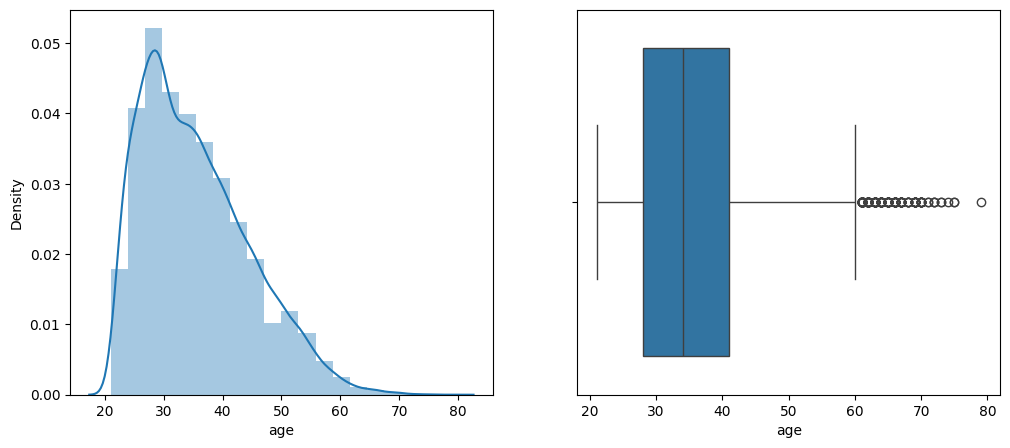

In [38]:
plt.figure(figsize=(12,5))
# plt.title('Customer Age distribution')

plt.subplot(1,2,1)
sns.distplot(df['age'],bins=20)

plt.subplot(1,2,2)
sns.boxplot(data=df,x='age')


plt.show()

In [39]:
# Skewness
df['age'].skew()

np.float64(0.7384976486065989)

### Observations:
    Age is from 21 to 79
    Mostly are between 25 to 35
    Age data is right skewed - 0.74


### Multivariate analysis of age

<Axes: xlabel='next_month_default', ylabel='age'>

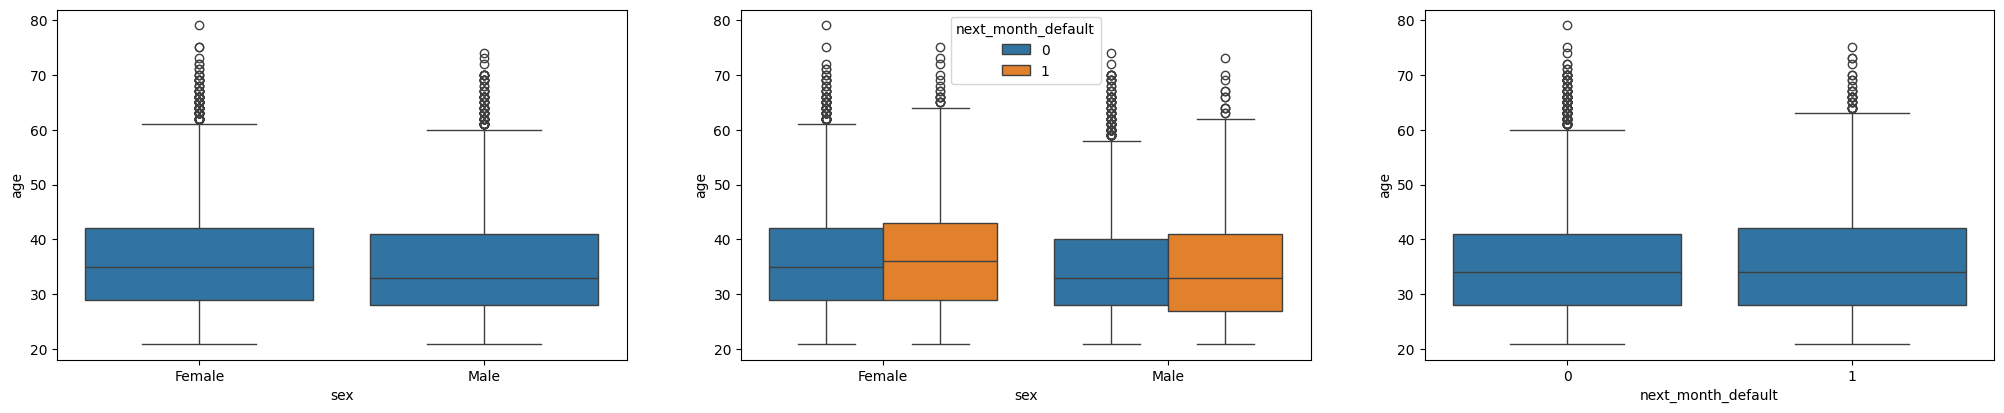

In [40]:
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.boxplot(x='sex',y='age',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='sex',y='age',data=df,hue='next_month_default')

plt.subplot(2,3,3)
sns.boxplot(x='next_month_default',y='age',data=df)



### Mutivariate analysis of age,limit_bal and default

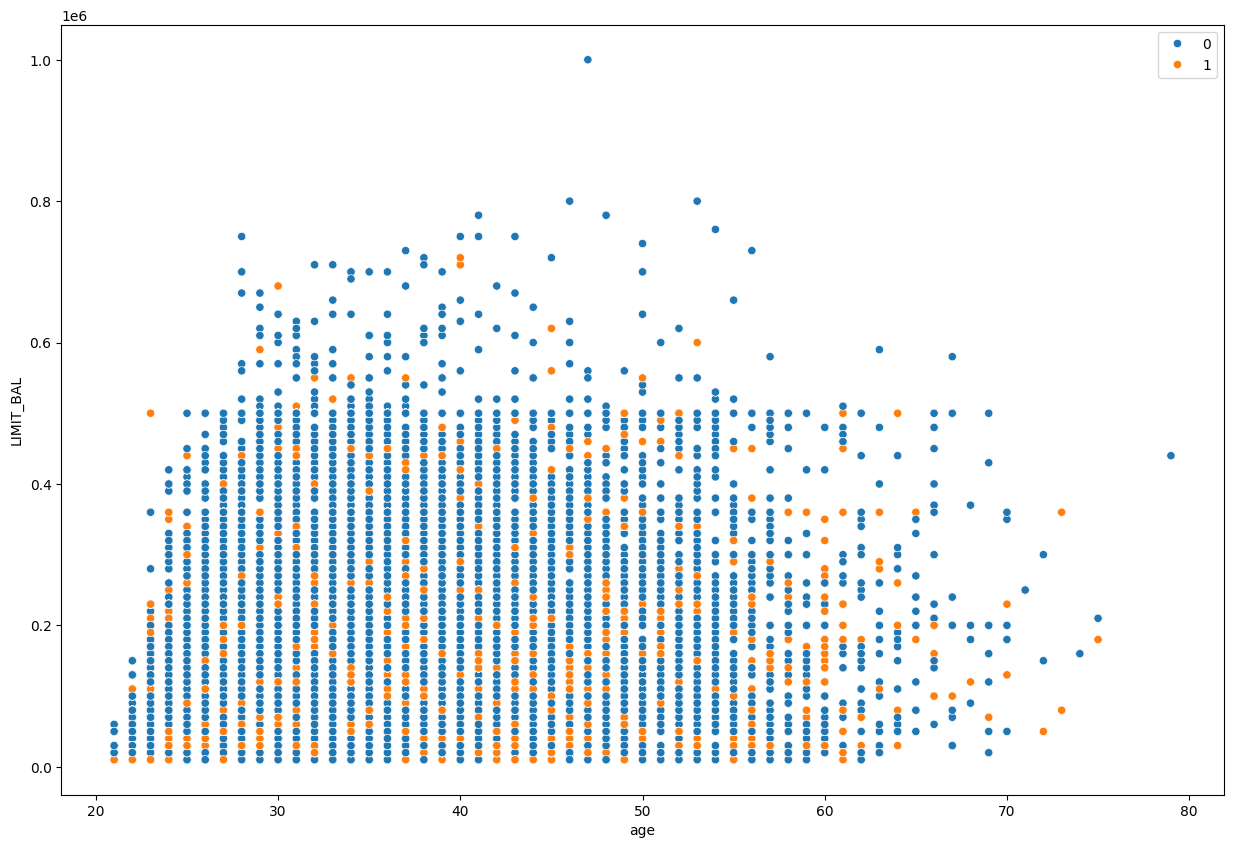

In [41]:

plt.figure(figsize=(15,10))
sns.scatterplot(x= 'age', y='LIMIT_BAL',data = df, hue=df['next_month_default'])
plt.legend()
plt.show()

Shows that if age and limit balance are higher chance of defaulting is low

### Mutivariate analysis of age,education and default

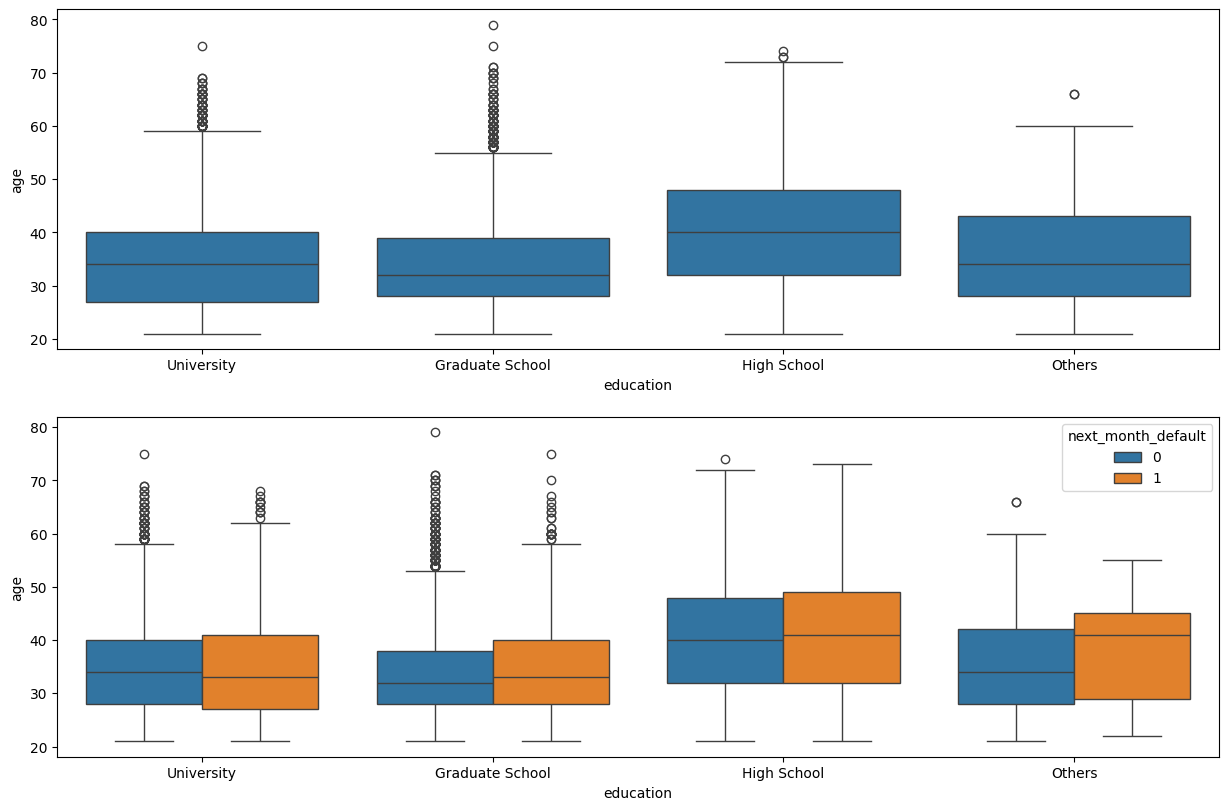

In [42]:
plt.figure(figsize=(15, 15))

# Boxplot displaying distribution of age by education
plt.subplot(3,1,1)
sns.boxplot(x='education', y='age',data = df)

# Boxplot displaying distribution of age by education and 'default'
plt.subplot(3,1,2)
sns.boxplot(x='education', y='age',data = df , hue=df['next_month_default'])

plt.show()


### Mutivariate analysis of age and Bill amounts

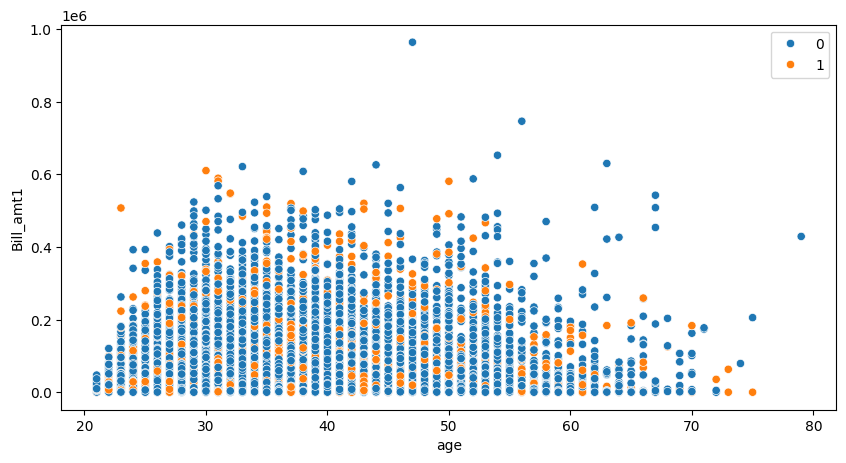

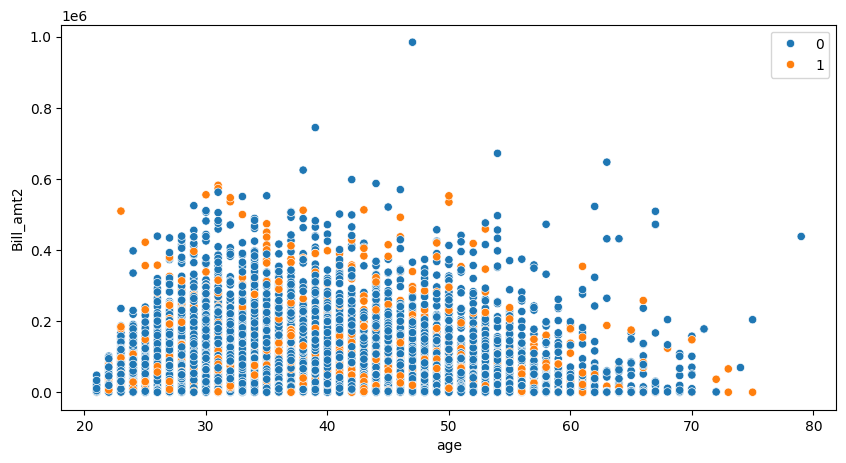

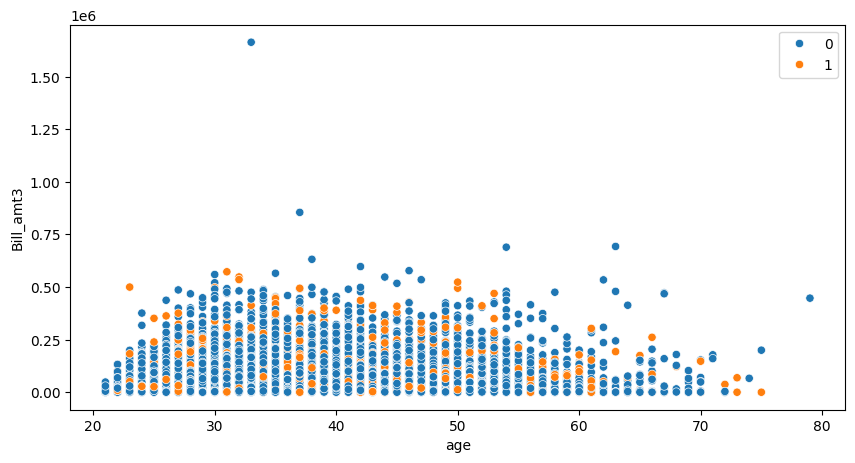

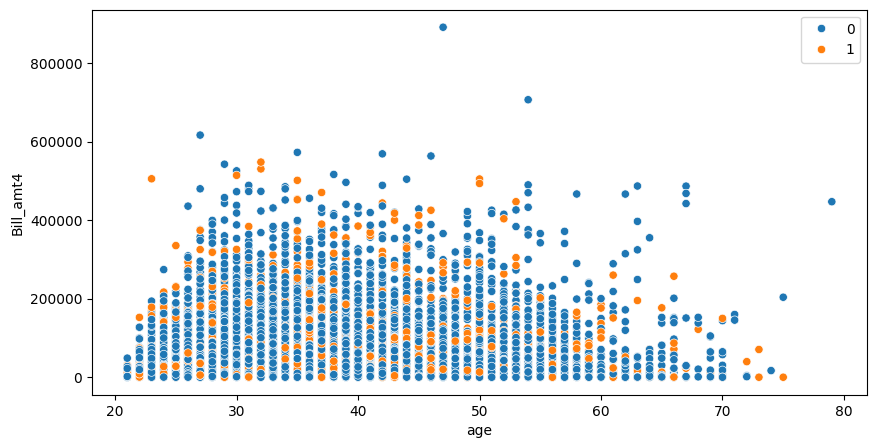

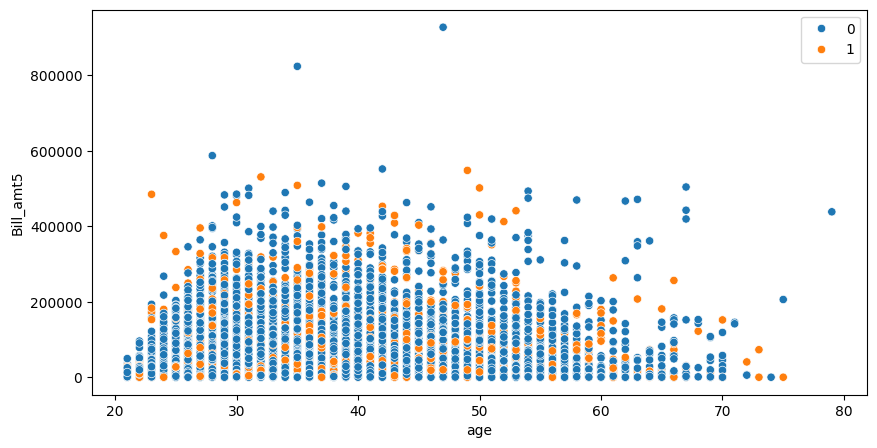

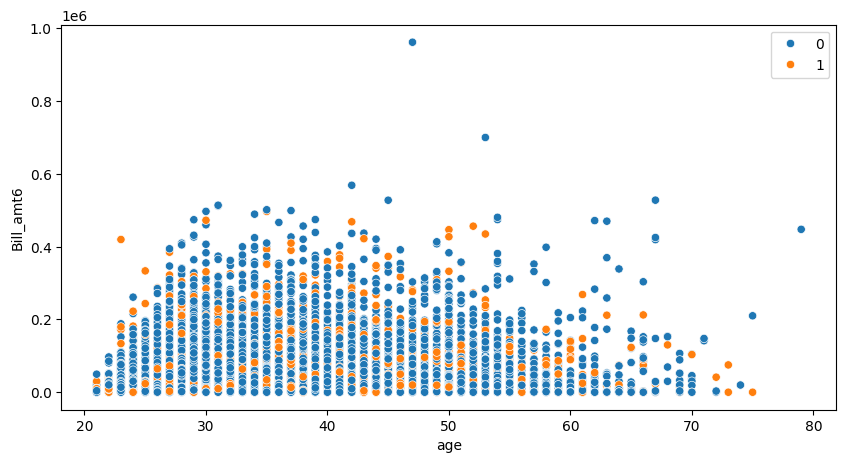

In [43]:
bill_amt_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']
for col in bill_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x='age',y = col, data = df, hue=df['next_month_default'])
  plt.legend()

Age does not have significant affect on bill amount

###  Mutivariate analysis of age and payment amount

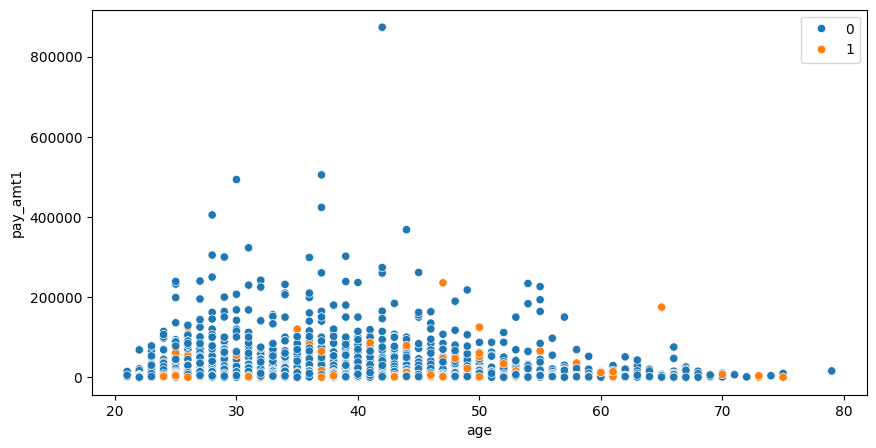

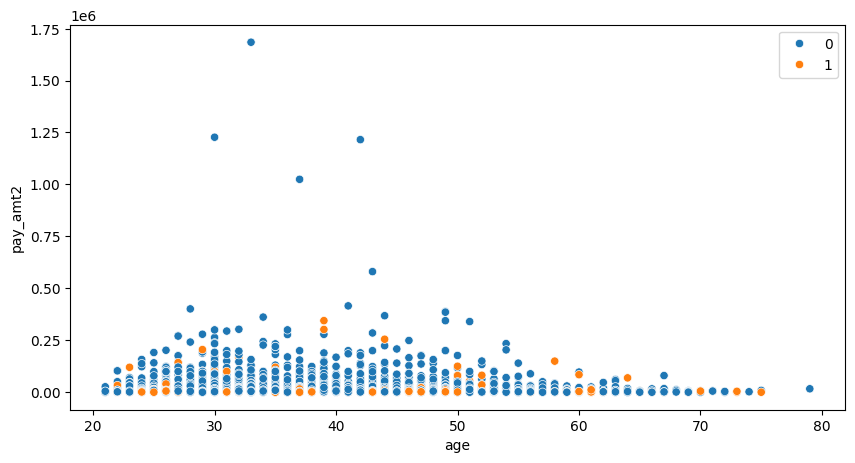

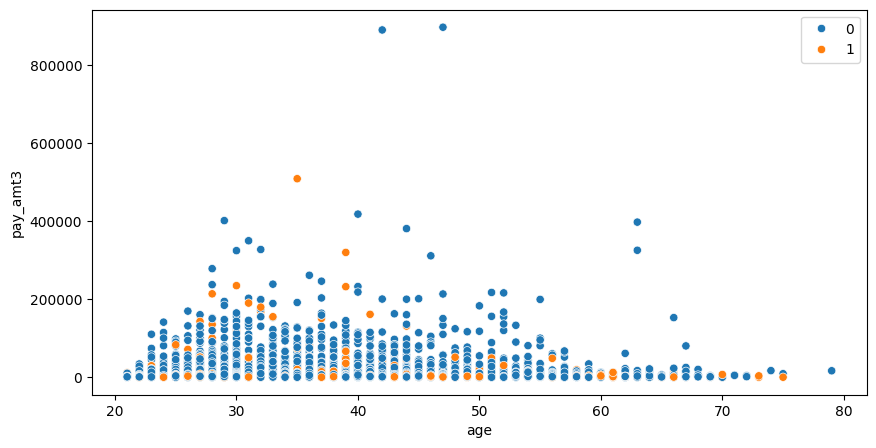

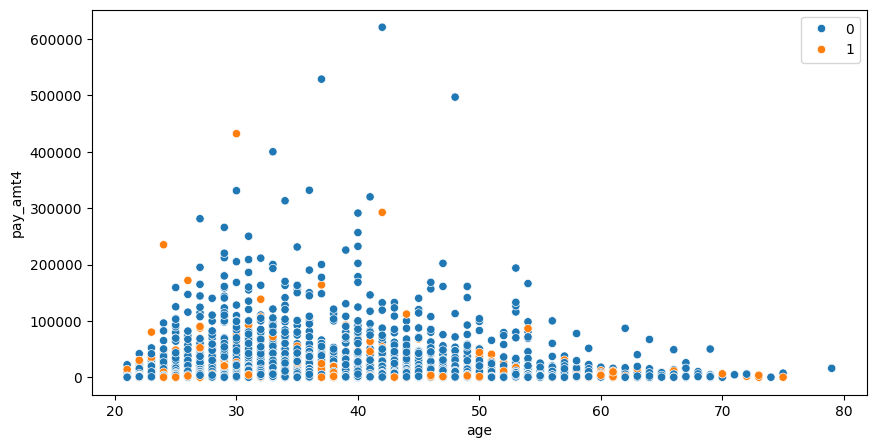

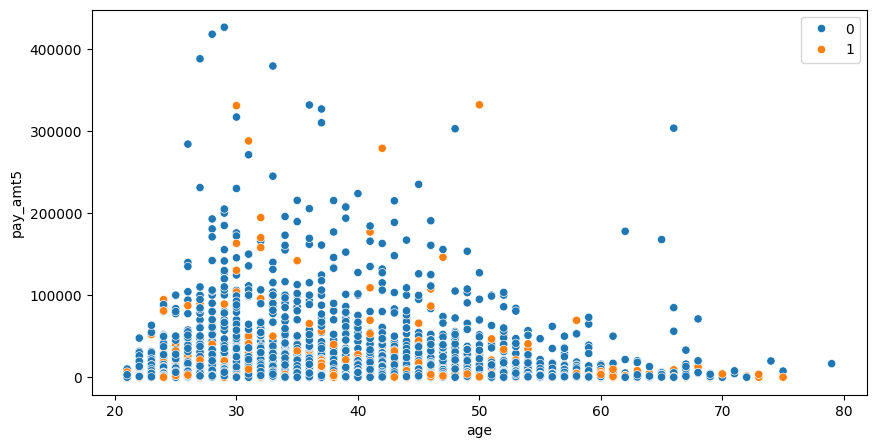

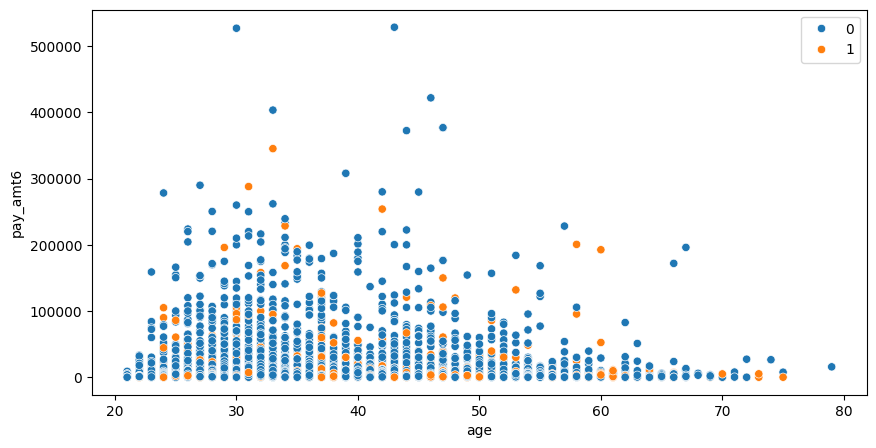

In [44]:
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
for col in pay_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x='age', y=col, data = df,  hue=df['next_month_default'])
  plt.legend()

customer with high payment amount are mostly between 25-50 ,

Below 35 - Defaulter are decresing as we move  from month1 to month6

## Limit_Balance

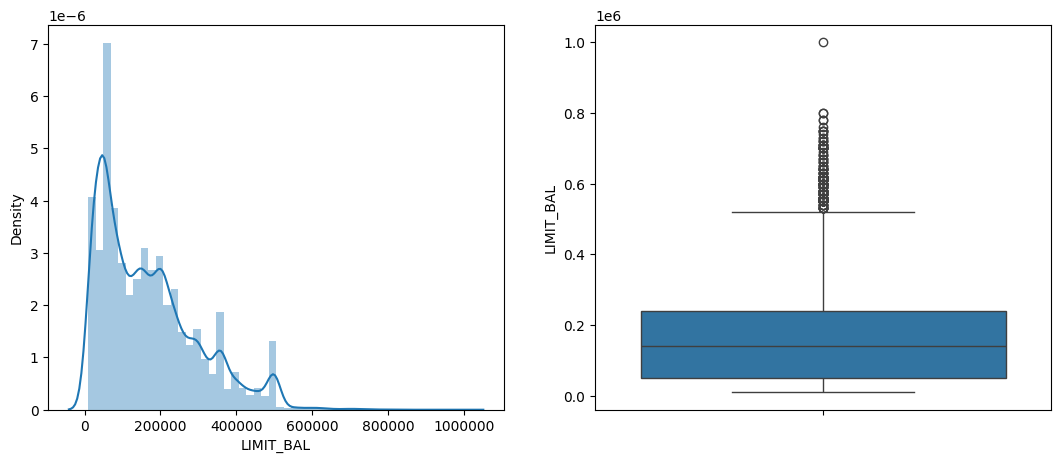

In [45]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1,3,2)
sns.boxplot(df['LIMIT_BAL'])

plt.show()

In [46]:
df['LIMIT_BAL'].describe()

count      25121.000000
mean      168358.823295
std       129866.750911
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [47]:
df['LIMIT_BAL'].skew()

np.float64(0.994953217465767)

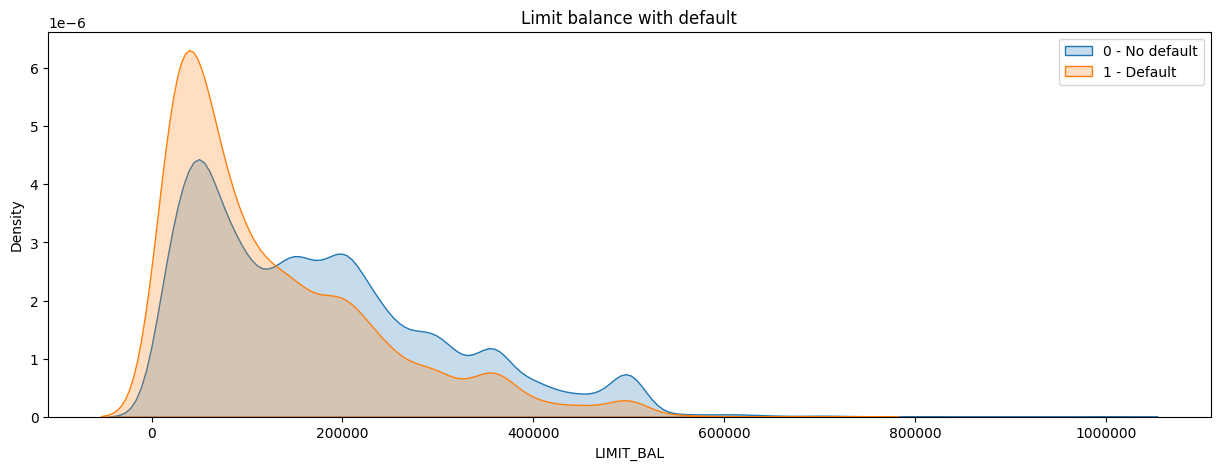

In [48]:
plt.figure(figsize=(15, 5))
plt.title('Limit balance with default')
sns.kdeplot(df.loc[(df['next_month_default'] == 0), 'LIMIT_BAL'], label = '0 - No default', shade = True)
sns.kdeplot(df.loc[(df['next_month_default'] == 1), 'LIMIT_BAL'], label = '1 - Default', shade = True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()

plt.show()

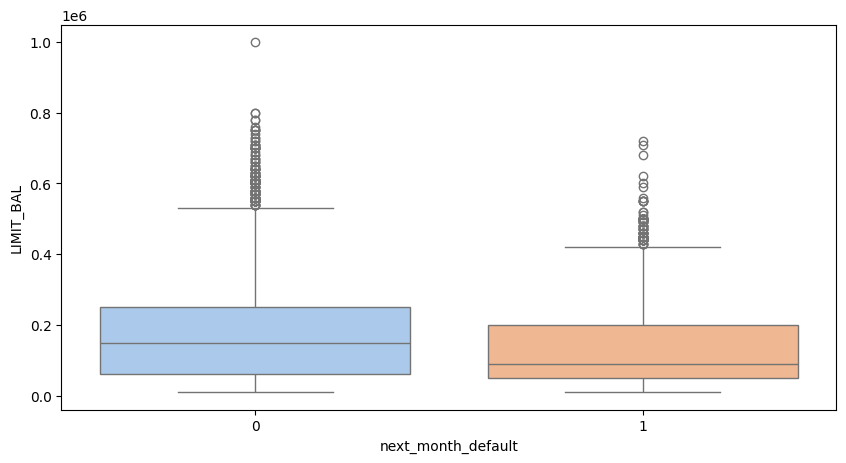

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='next_month_default',y='LIMIT_BAL',data = df,palette='pastel')
plt.show()

* Most Customer have limit balance between 0-175000
* Default rate is higher below 175000
* Rightly skewed


### Limit Balance with sex

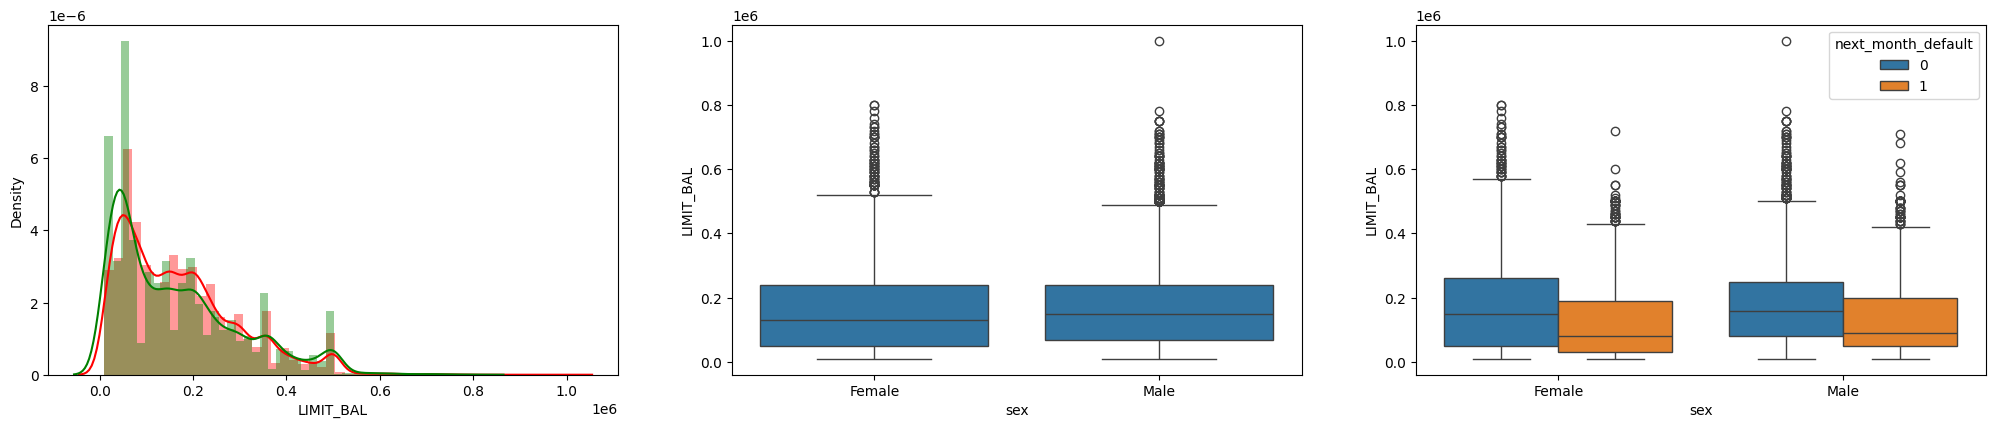

In [50]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.distplot(df[df['sex']=='Male']['LIMIT_BAL'], color='r', label='MALE')
sns.distplot(df[df['sex']=='Female']['LIMIT_BAL'], color='g', label='FEMALE')

plt.subplot(2,3,2)
sns.boxplot(x='sex',y='LIMIT_BAL',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='sex',y='LIMIT_BAL',data=df,hue='next_month_default')

plt.show()

In [51]:
df.groupby(['sex'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count           mean            std      min      10%      20%  \
sex                                                                        
Female   9930.0  164483.987915  136518.286753  10000.0  20000.0  50000.0   
Male    15191.0  170891.712198  125267.964752  10000.0  30000.0  50000.0   

            30%       40%       50%       60%       70%       80%       90%  \
sex                                                                           
Female  50000.0   90000.0  130000.0  170000.0  210000.0  280000.0  360000.0   
Male    80000.0  110000.0  150000.0  180000.0  220000.0  270000.0  360000.0   

             99%        max  
sex                          
Female  500000.0   800000.0  
Male    500000.0  1000000.0

In [52]:
df.groupby(['sex','next_month_default'])['LIMIT_BAL'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

count           mean            std      min  \
sex    next_month_default                                                   
Female 0                    7858.0  174846.780351  139523.143559  10000.0   
       1                    2072.0  125183.397683  116390.114564  10000.0   
Male   0                   12479.0  179229.585704  126337.685866  10000.0   
       1                    2712.0  132525.811209  112545.737566  10000.0   

                               10%      20%      30%       40%       50%  \
sex    next_month_default                                                  
Female 0                   30000.0  50000.0  60000.0  100000.0  150000.0   
       1                   20000.0  30000.0  50000.0   50000.0   80000.0   
Male   0                   40000.0  60000.0  90000.0  120000.0  160000.0   
       1                   30000.0  40000.0  50000.0   70000.0   90000.0   

                                60%       70%       80%       90%       99%  \
sex    next_month_default                                                     
Female 0                   180000.0  230000.0  290000.0  380000.0  500000.0   
       1                   120000.0  160000.0  200000.0  300000.0  500000.0   
Male   0                   200000.0  230000.0  280000.0  360000.0  500000.0   
       1                   130000.0  170000.0  220000.0  300000.0  500000.0   

                                 max  
sex    next_month_default             
Female 0                    800000.0  
       1                    720000.0  
Male   0                   1000000.0  
       1                    710000.0

* Mean Limit is almost same for both gender
* When seperate on the basis of default , mean limits differs significantly for defaulters and non defaulters

### Limit balance and payment status

ValueError: Could not interpret value `pay` for `x`. An entry with this name does not appear in `data`.

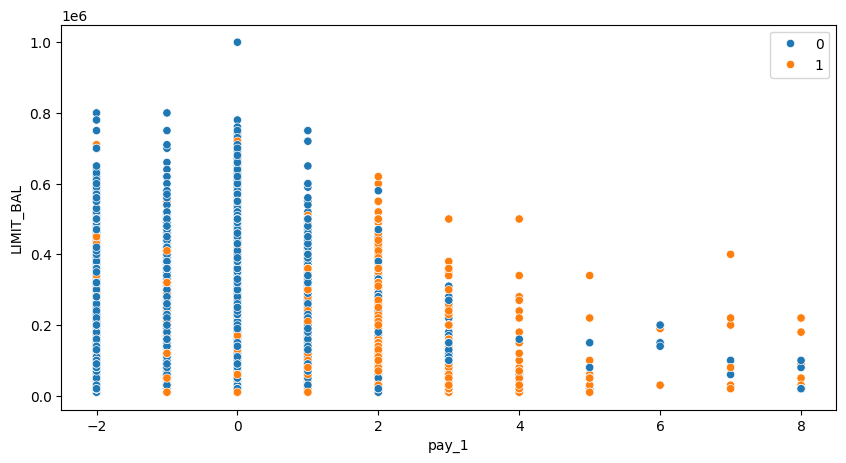

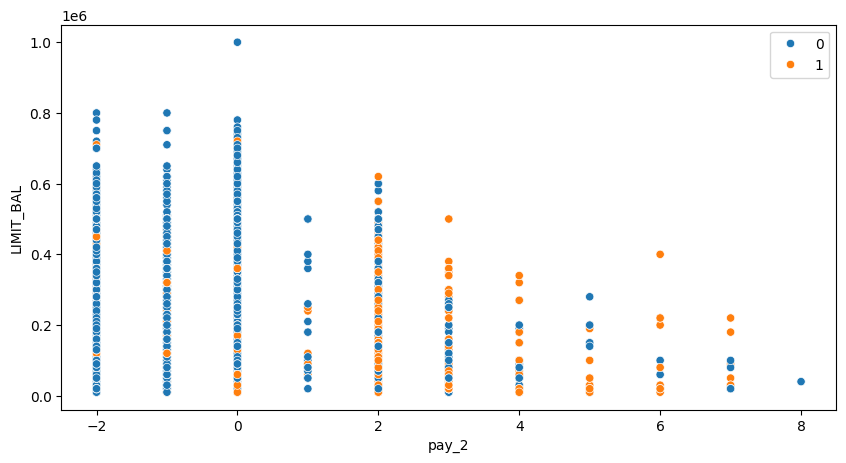

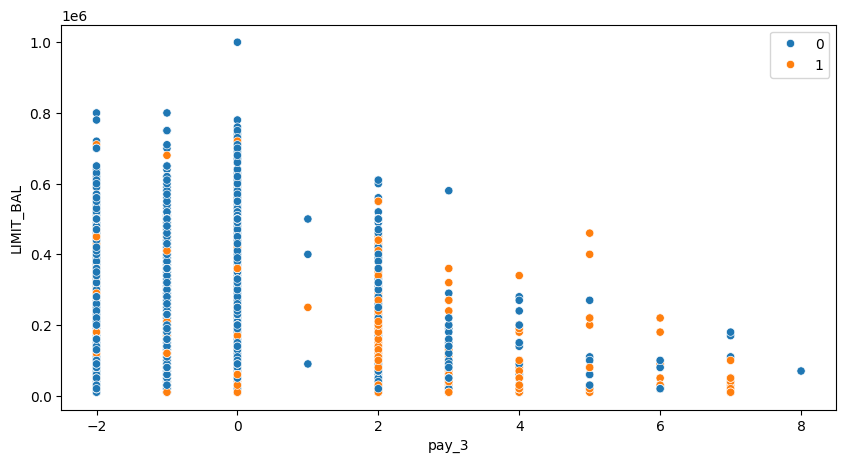

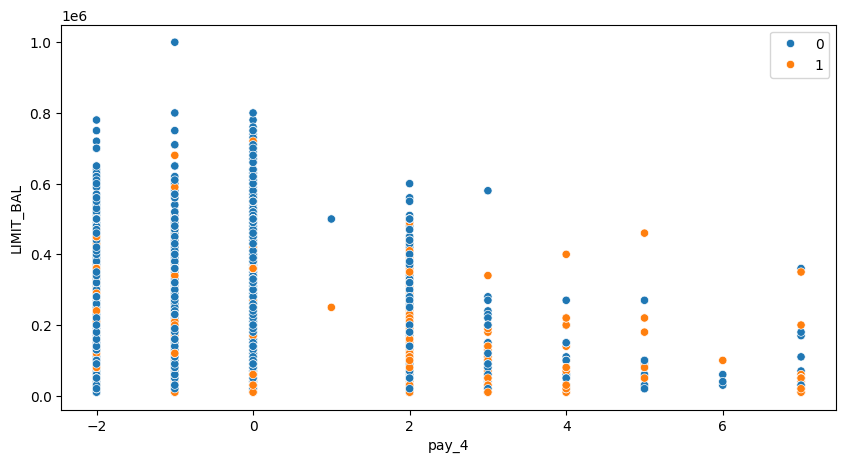

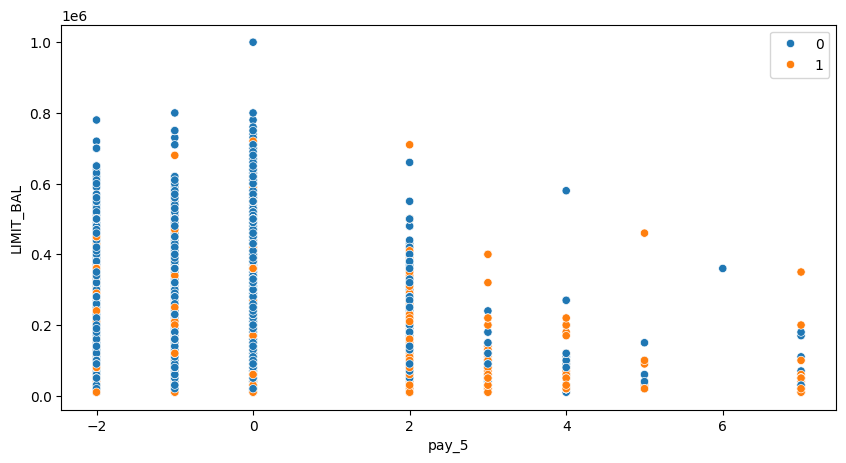

<Figure size 1000x500 with 0 Axes>

In [53]:
pay_cols = ['pay_1',	'pay_2',	'pay_3',	'pay_4',	'pay_5',	'pay']
for col in pay_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x = col,y='LIMIT_BAL' , data = df, hue=df['next_month_default'])
  plt.legend()

* Number of defaulters increased with customer with low limit balance

### Limit balance and Bill amount

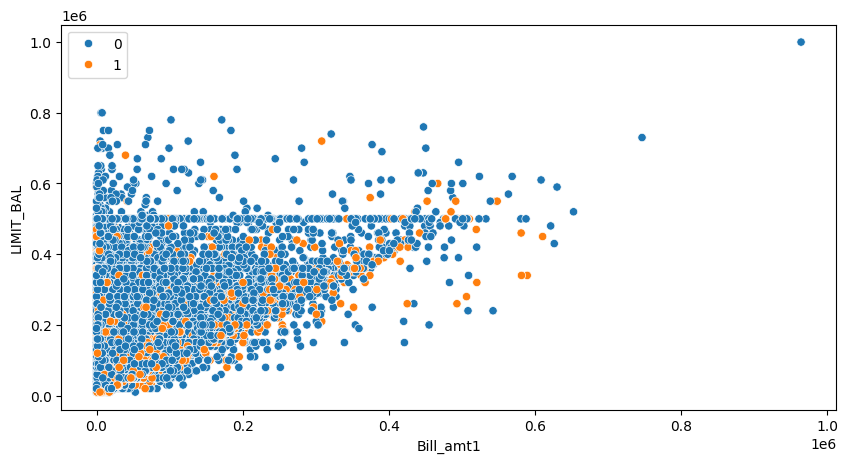

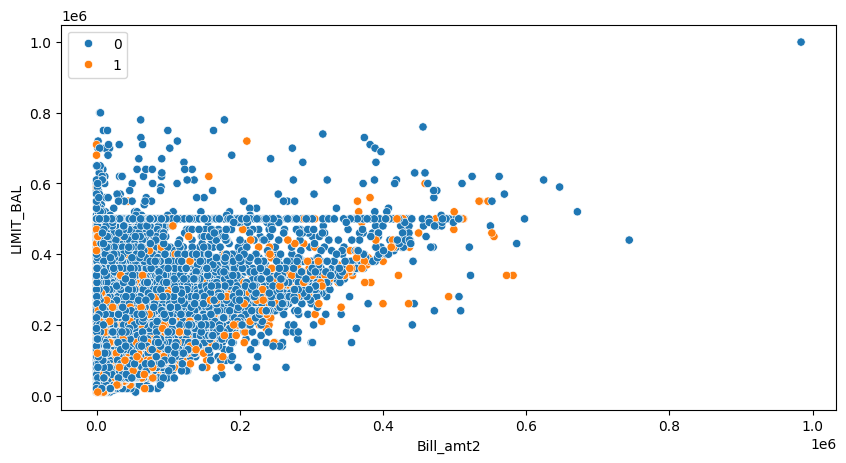

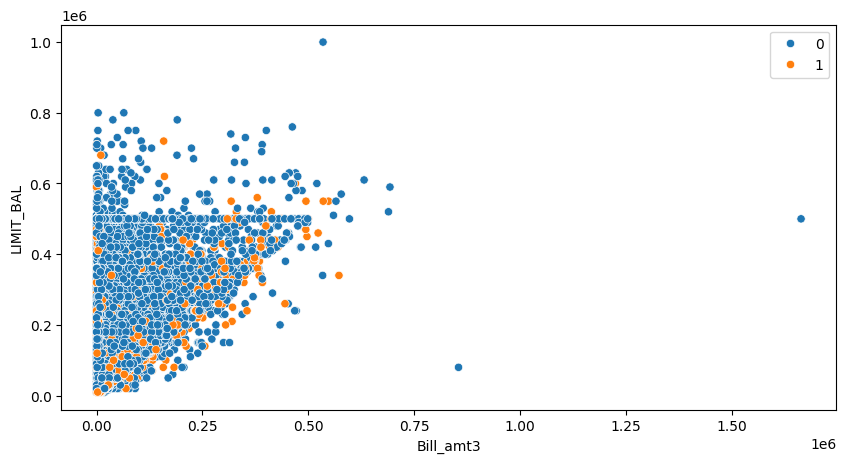

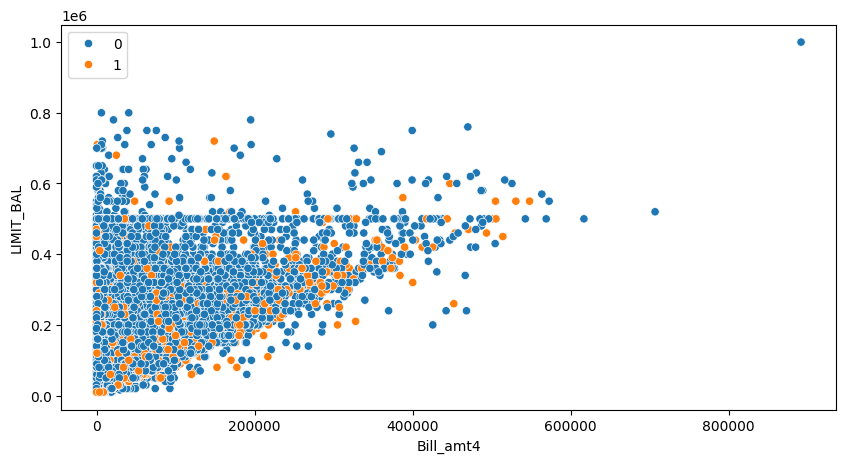

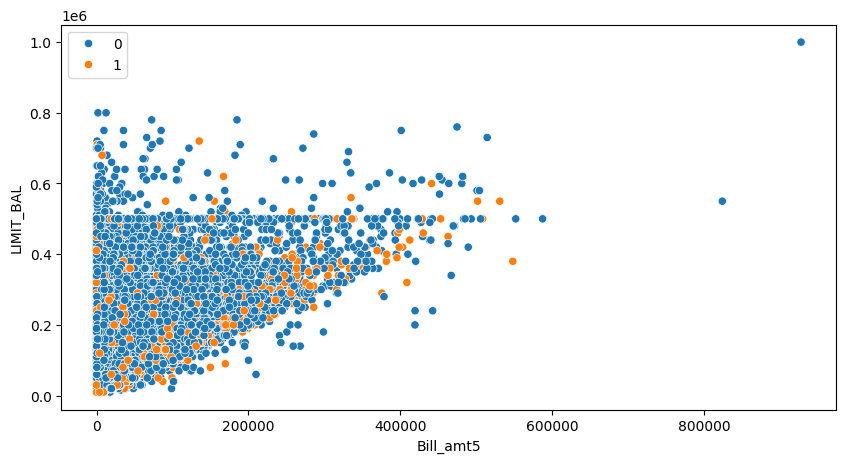

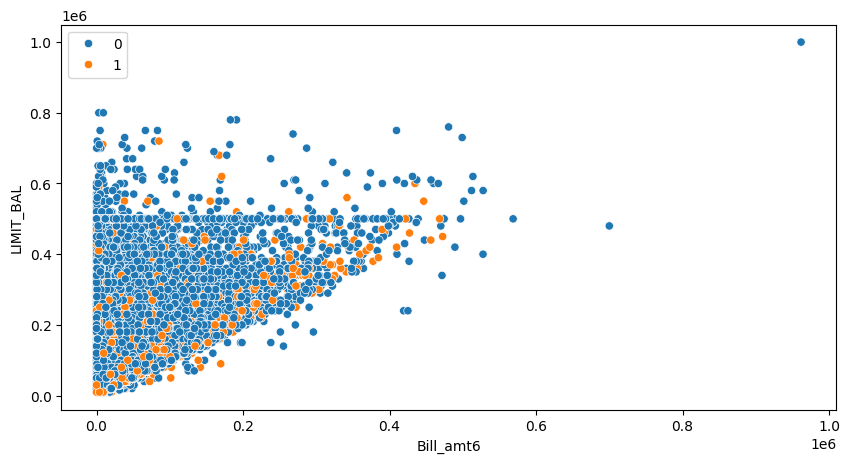

In [56]:
bill_amt_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']
for col in bill_amt_cols:
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=col, y='LIMIT_BAL', data = df,hue=df['next_month_default'])
  plt.legend()

* Number of customer drastically decreases after 500000
* LImit balance increase and bill amount decreases

## Bill amount 1 to 6

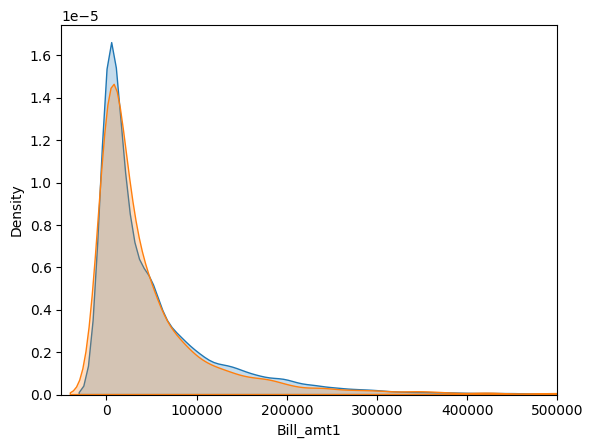

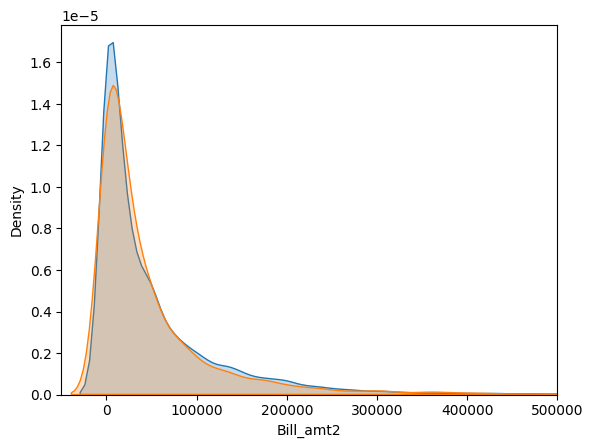

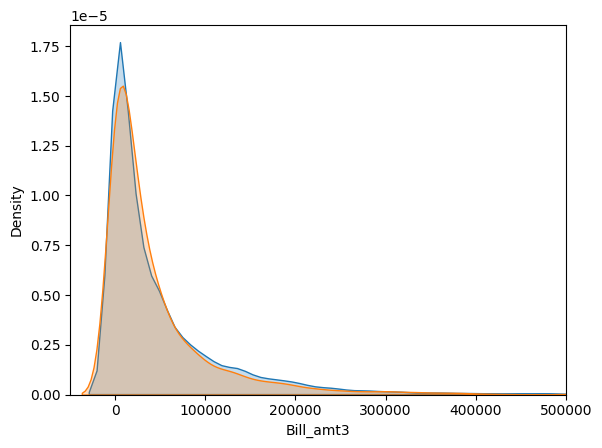

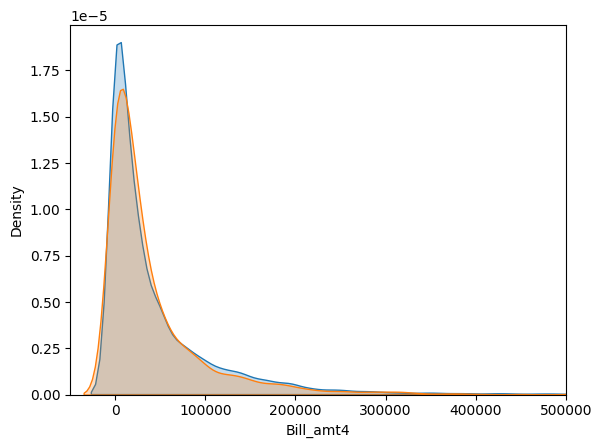

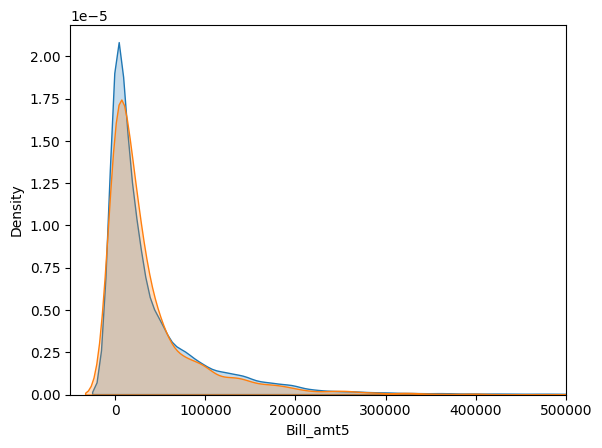

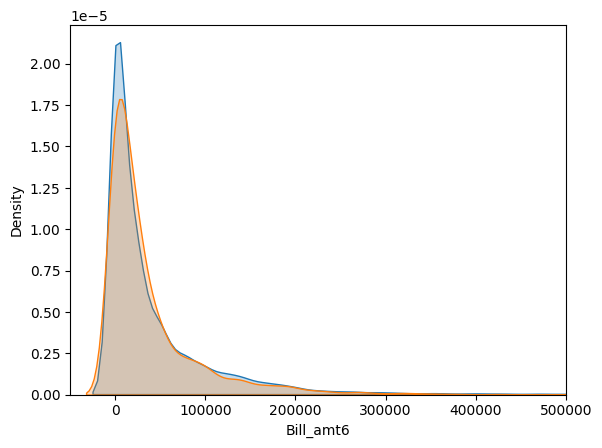

In [57]:
bill_amt_cols = ['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4','Bill_amt5', 'Bill_amt6']
for col in bill_amt_cols:
    sns.kdeplot(df.loc[(df['next_month_default'] == 0), col], label = '0 - No Default', shade = True)
    sns.kdeplot(df.loc[(df['next_month_default'] == 1), col], label = '1 - Default', shade = True)
    plt.xlim(-50000,500000)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel(col)
    plt.show()

* Rightly Skewed

### Bill amount with sex

Bill_amt1 with sex and default 


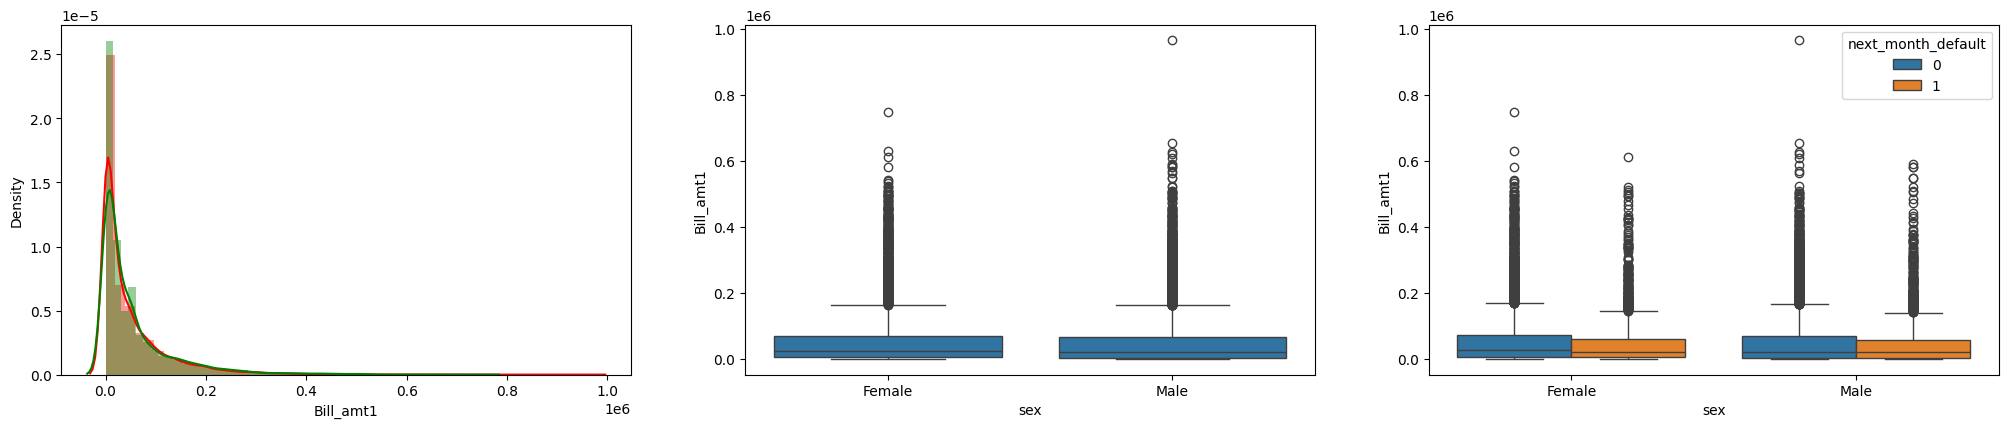

Bill_amt2 with sex and default 


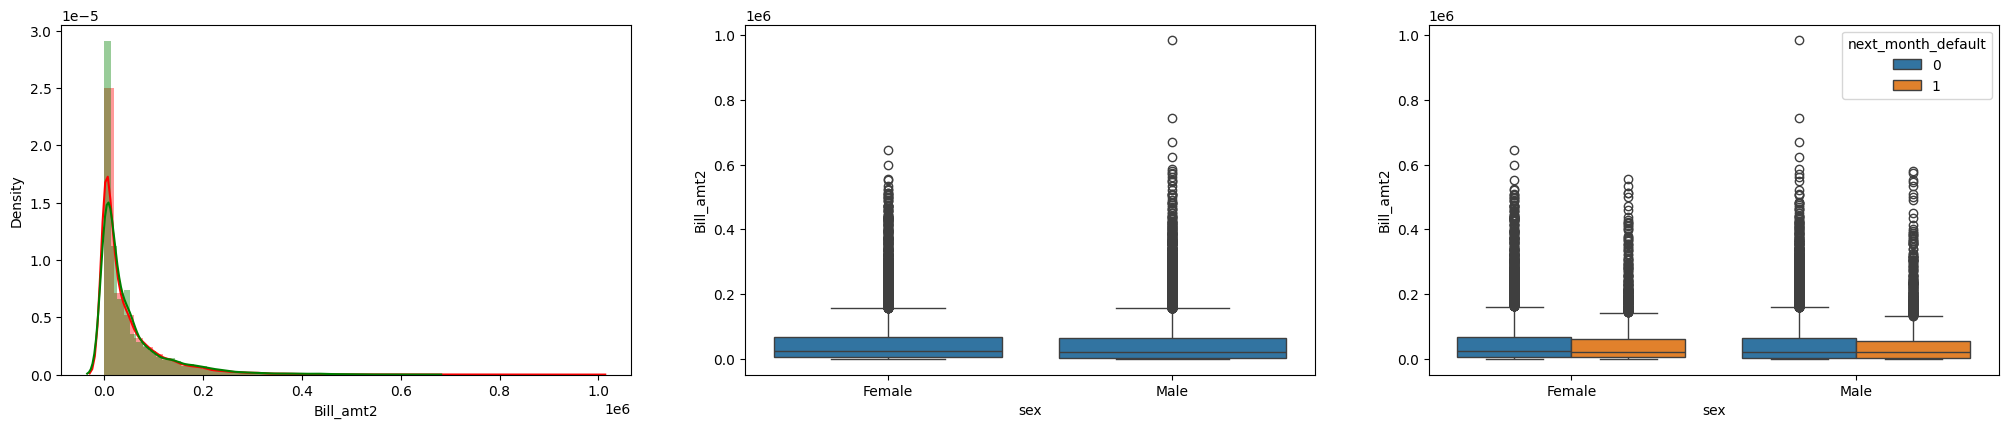

Bill_amt3 with sex and default 


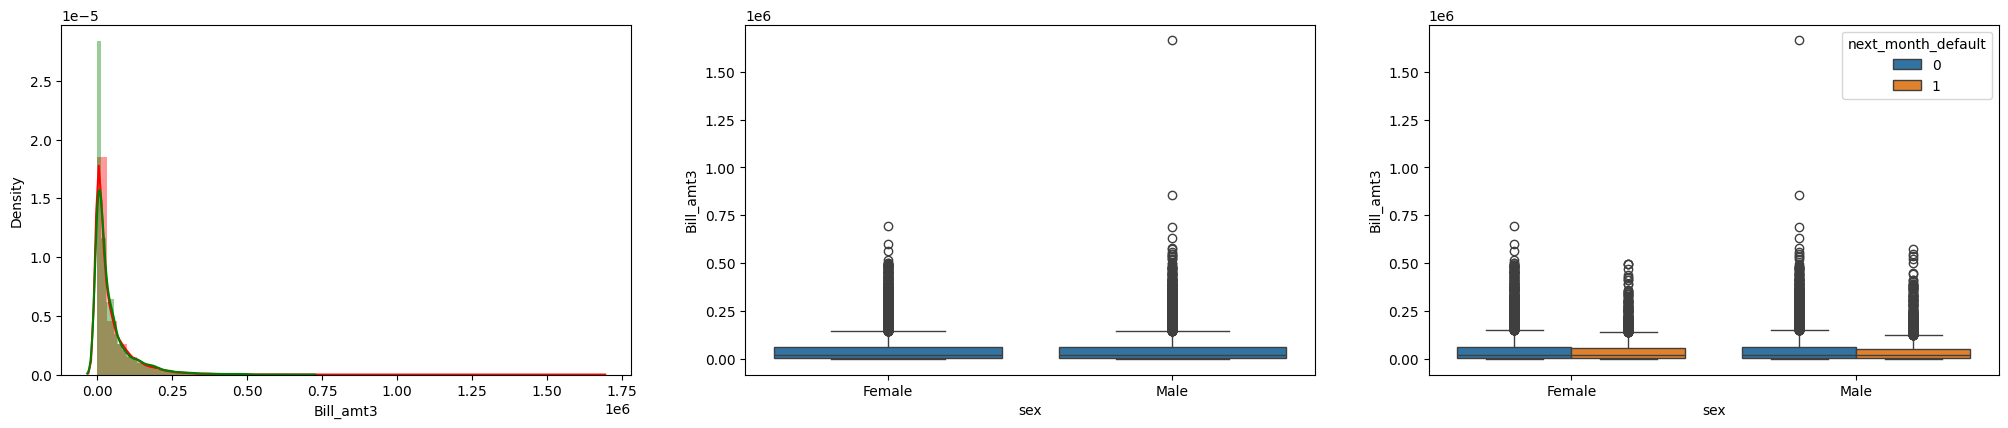

Bill_amt4 with sex and default 


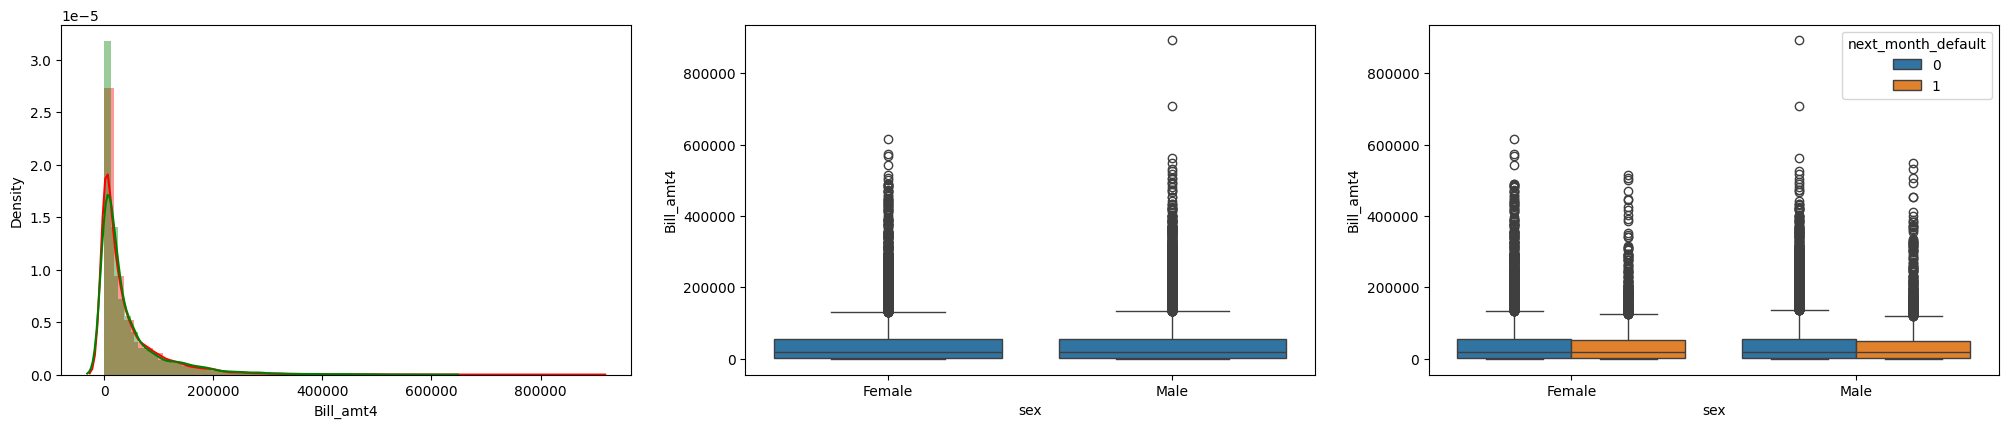

Bill_amt5 with sex and default 


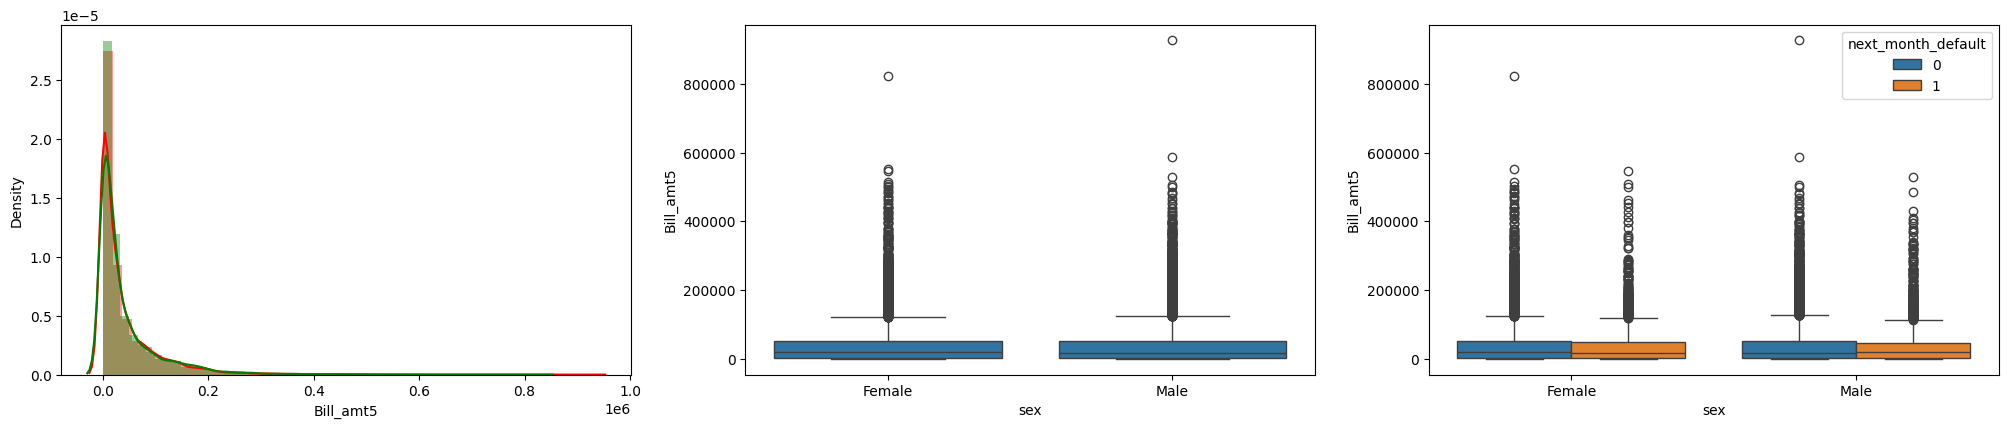

Bill_amt6 with sex and default 


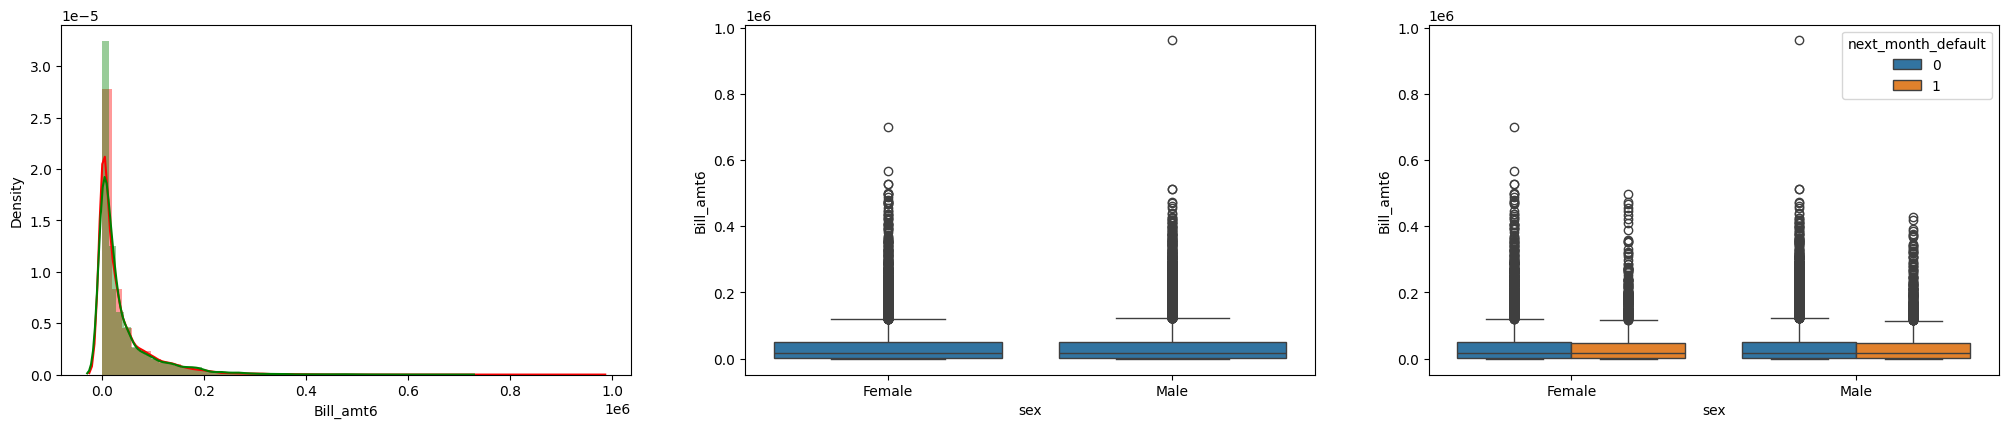

In [58]:

for col in bill_amt_cols:

  print(col ,'with sex and default ' )
  plt.figure(figsize=(25,10))

  plt.subplot(2,3,1)
  sns.distplot(df[df['sex']=='Male'][col], color='r', label='MALE')
  sns.distplot(df[df['sex']=='Female'][col], color='g', label='FEMALE')

  plt.subplot(2,3,2)
  sns.boxplot(x='sex',y=col,data=df)

  plt.subplot(2,3,3)
  sns.boxplot(x='sex',y=col,data=df,hue='next_month_default')

  plt.show()

In [59]:
for col in bill_amt_cols:
  print(col )
  print(df.groupby(['sex'])[col].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]))

Bill_amt1
          count          mean           std  min      10%       20%       30%  \
sex                                                                             
Female   9930.0  54177.635872  76854.252962  0.0  389.798  2501.386  7722.329   
Male    15191.0  49266.369535  70878.224942  0.0  139.860  1603.630  5024.350   

              40%       50%        60%        70%        80%        90%  \
sex                                                                       
Female  15695.822  24349.31  40709.874  53672.514  86715.678  151391.47   
Male    11576.930  21068.54  34803.280  51733.740  81978.470  136809.12   

                99%        max  
sex                             
Female  376948.2442  746813.18  
Male    329143.5970  964511.16  
Bill_amt2
          count          mean           std  min      10%       20%       30%  \
sex                                                                             
Female   9930.0  51728.415642  73660.451411  0.0  274.045  2

* Mean Amount have slight difference between male and female


In [60]:
for col in bill_amt_cols:
  print(col )
  print(df.groupby(['education'])[col].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]))

Bill_amt1
                   count          mean           std  min      10%       20%  \
education                                                                      
Graduate School   8944.0  48717.536096  78350.806939  0.0    0.590   795.058   
High School       4096.0  47455.568801  64983.865689  0.0  389.730  2565.270   
Others             424.0  70014.542524  88573.547889  0.0  319.795  2955.308   
University       11657.0  53752.725842  71297.852296  0.0  491.218  3533.254   

                      30%        40%       50%        60%        70%  \
education                                                              
Graduate School  2773.729   6457.104  14217.43  26854.704  47926.980   
High School      7824.655  15968.880  24930.56  38243.410  50392.780   
Others           8351.540  17872.266  30639.68  53840.382  88624.442   
University       9891.824  18156.004  27527.00  44303.040  58206.748   

                        80%         90%          99%        max  
education 

* Education also have variation in thier mean amounts thier values differs slightly

# Categorical Data Analysis

## Sex

In [61]:
df['sex'].value_counts()

sex
Male      15191
Female     9930
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

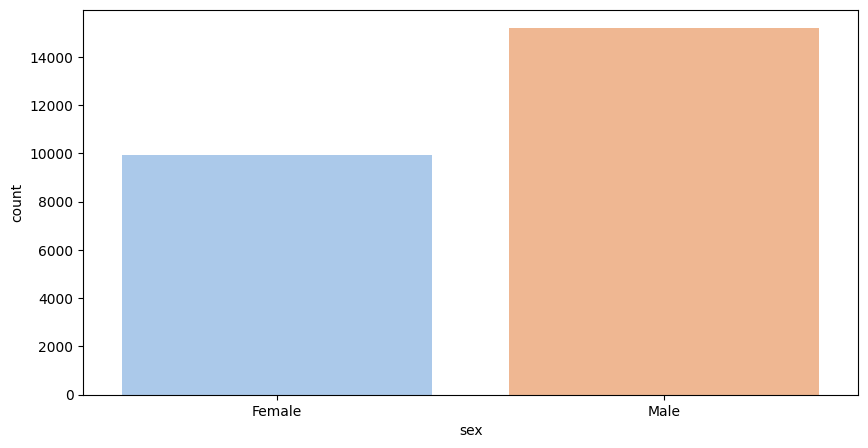

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'sex', data = df,palette='pastel')

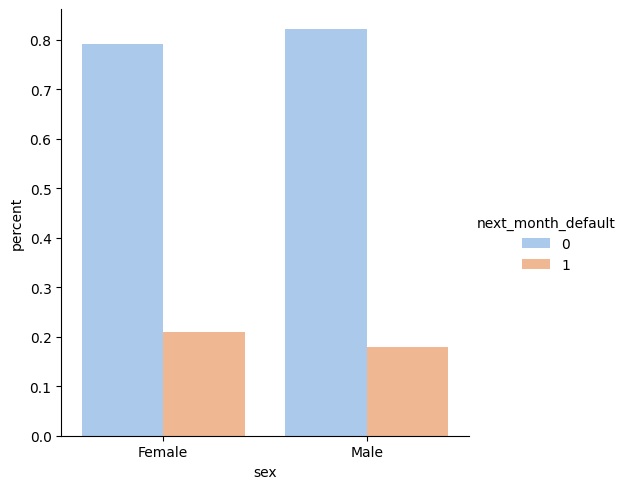

In [67]:
(df.groupby('sex')['next_month_default'].value_counts(normalize=True).rename('percent').reset_index().pipe((sns.catplot,'data'), x='sex',y='percent',hue='next_month_default',kind='bar',palette = 'pastel'))

* More Male customers than female

* More percentage of female defaulters than male

### Sex vs Education Mutivariate Anlysis  

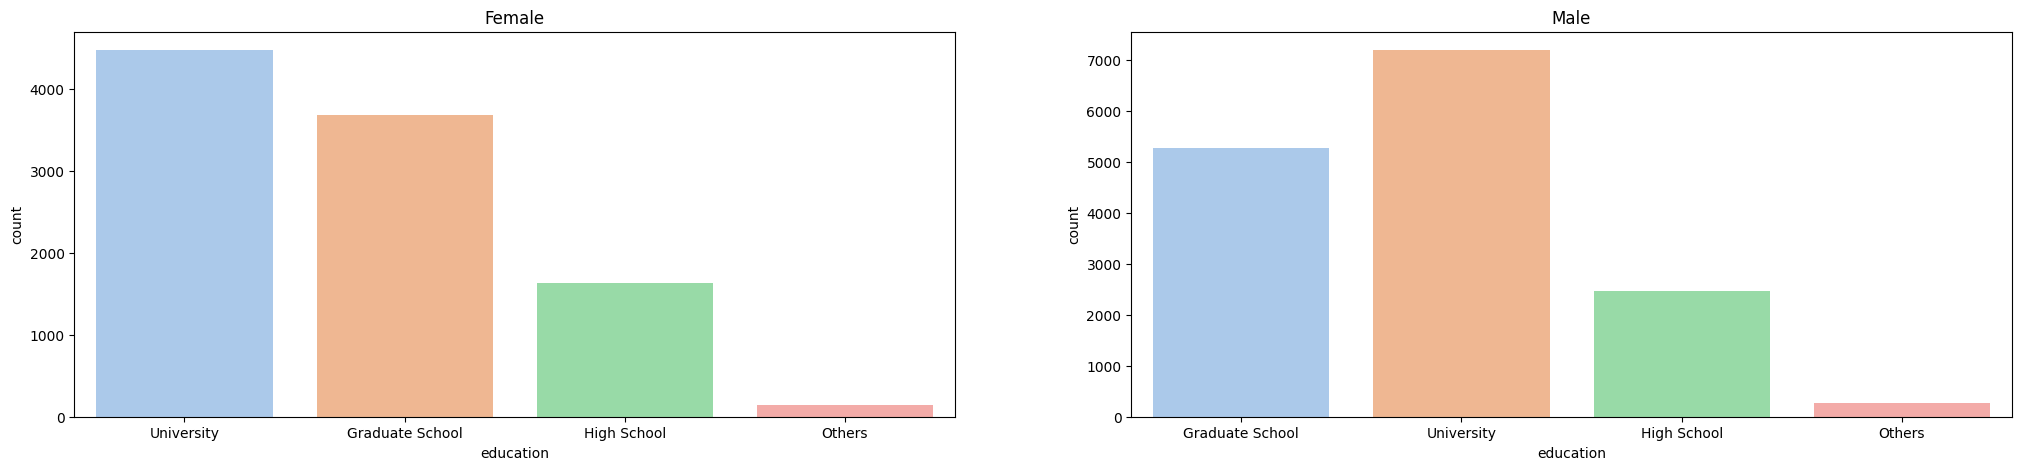

In [68]:
plt.figure(figsize=(25,5))
i = 1
for cat in df['sex'].unique():
  df_temp = df[df['sex']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='education',palette='pastel')
  i=i+1
plt.show()

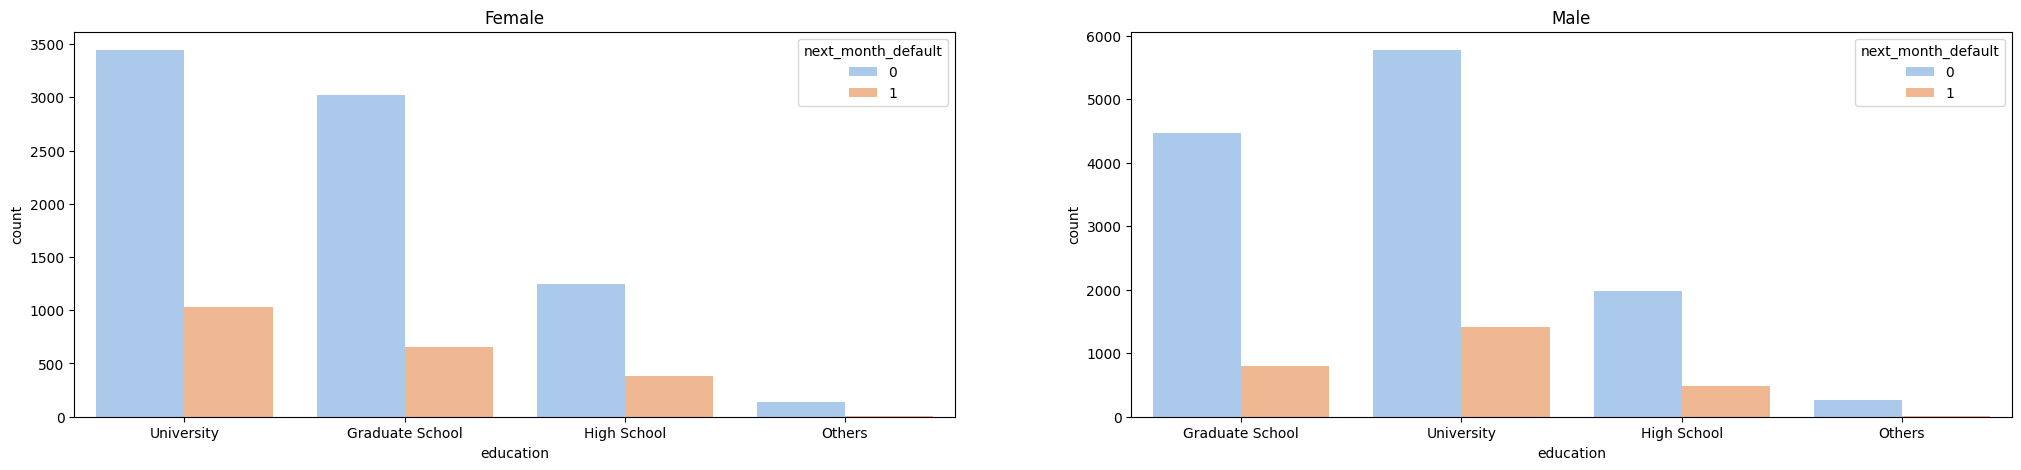

In [69]:
plt.figure(figsize=(25,5))
i = 1
for cat in df['sex'].unique():
  df_temp = df[df['sex']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='education',palette='pastel',hue='next_month_default')
  i=i+1
plt.show()

* Among Both gender mostly are university educated





### Sex vs Marriage Mutivariate Anlysis  

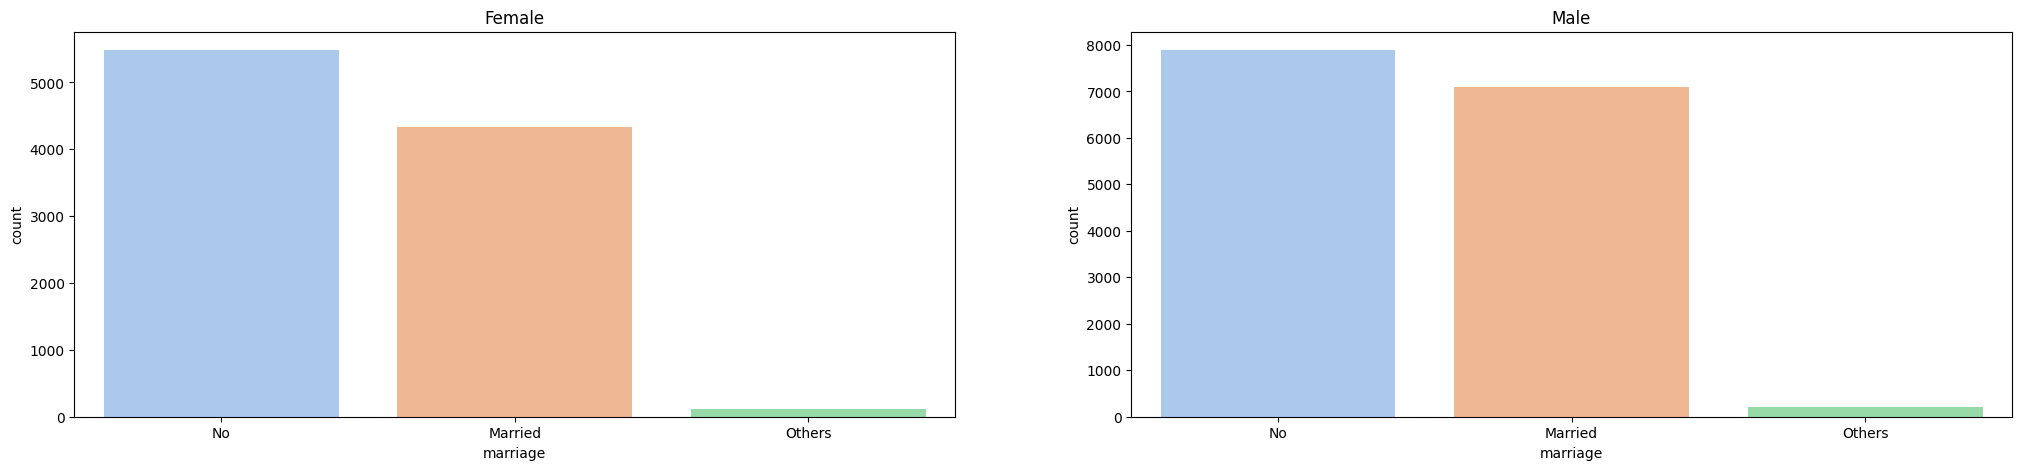

In [70]:
plt.figure(figsize=(25,5))
i = 1
for cat in df['sex'].unique():
  df_temp = df[df['sex']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='marriage',palette='pastel')
  i=i+1
plt.show()

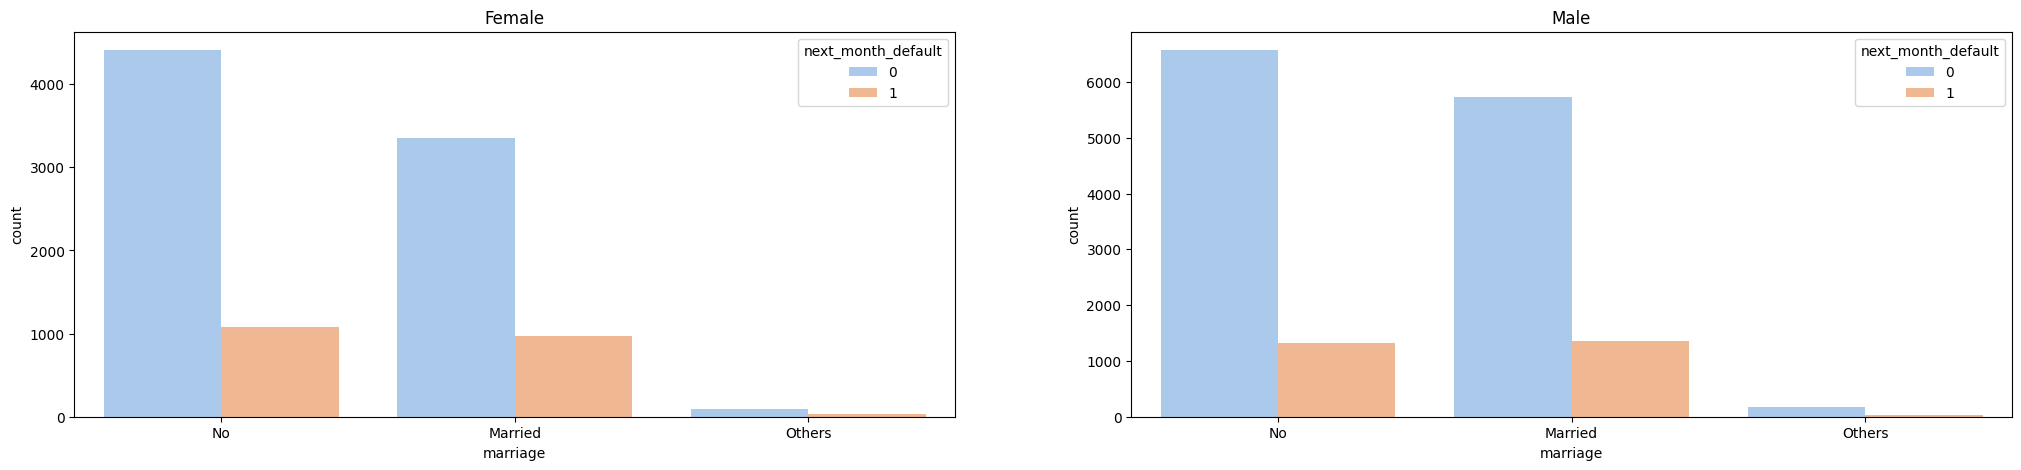

In [71]:
plt.figure(figsize=(25,5))
i = 1
for cat in df['sex'].unique():
  df_temp = df[df['sex']==cat]
  plt.subplot(1,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='marriage',palette='pastel',hue='next_month_default')
  i=i+1
plt.show()

* Both married and unmarried almost have same amount of defaulters

### Sex vs Pay_1 to Pay_6 Mutivariate Anlysis  

<Figure size 2500x500 with 0 Axes>

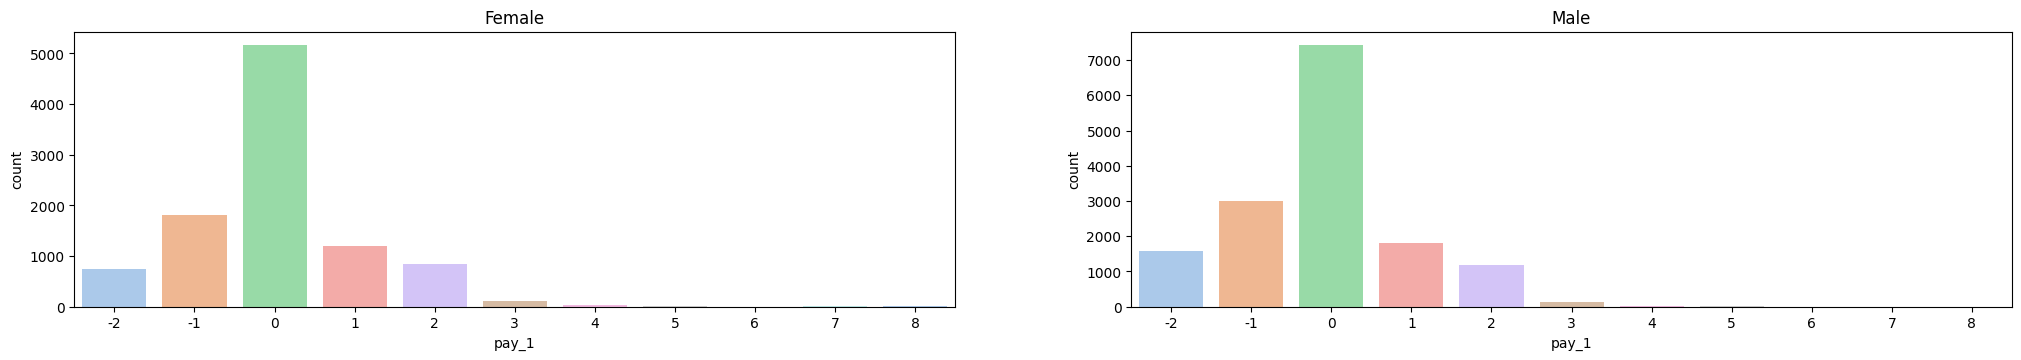

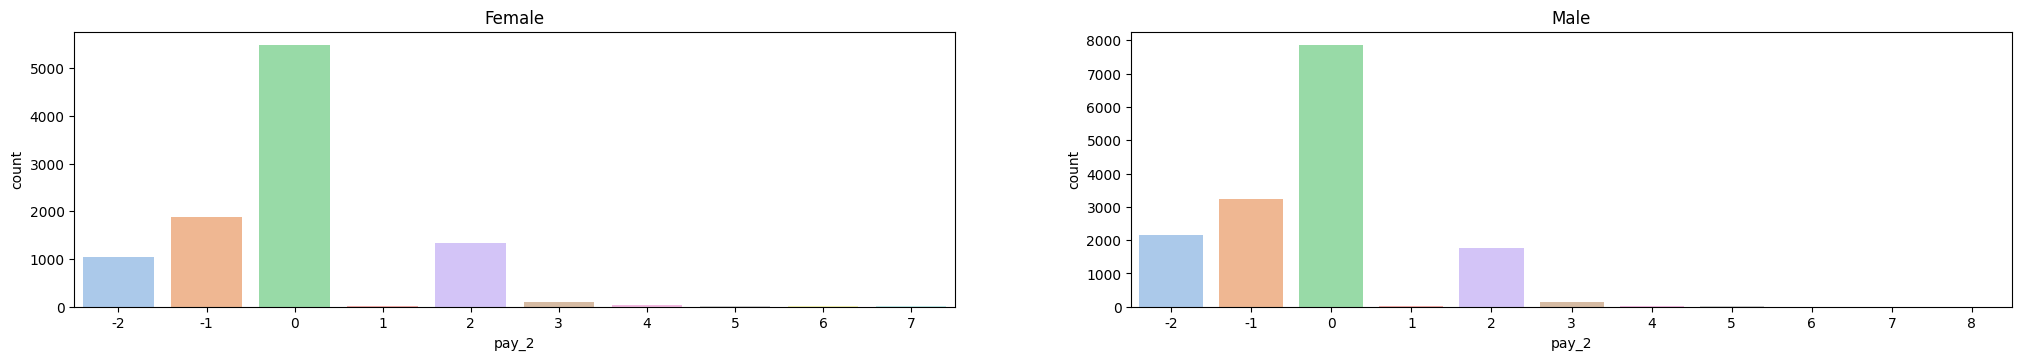

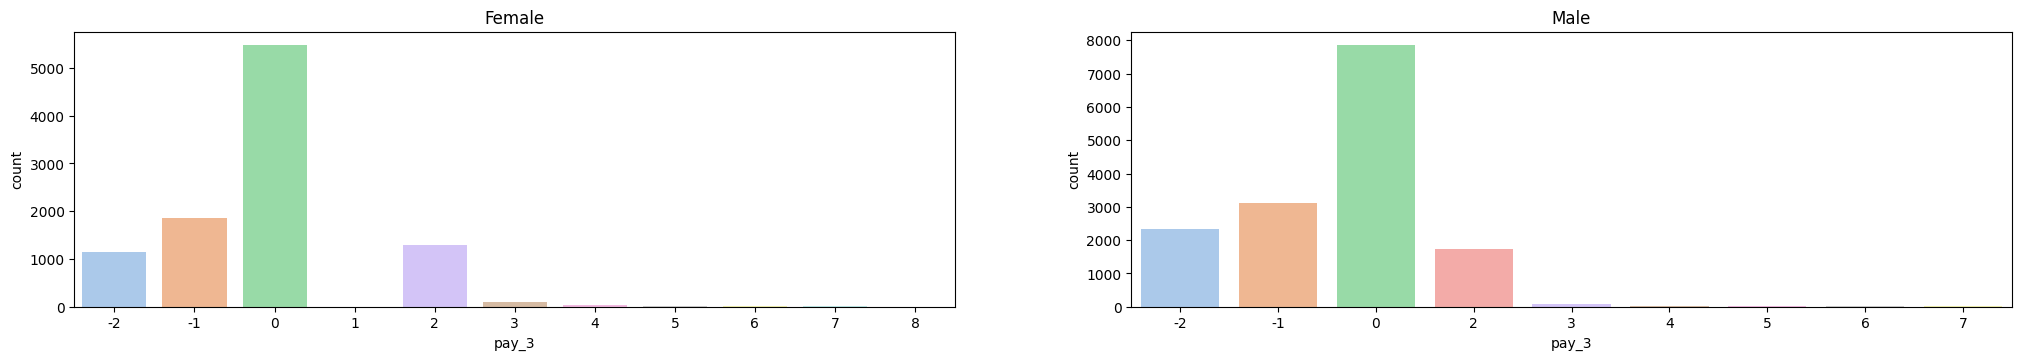

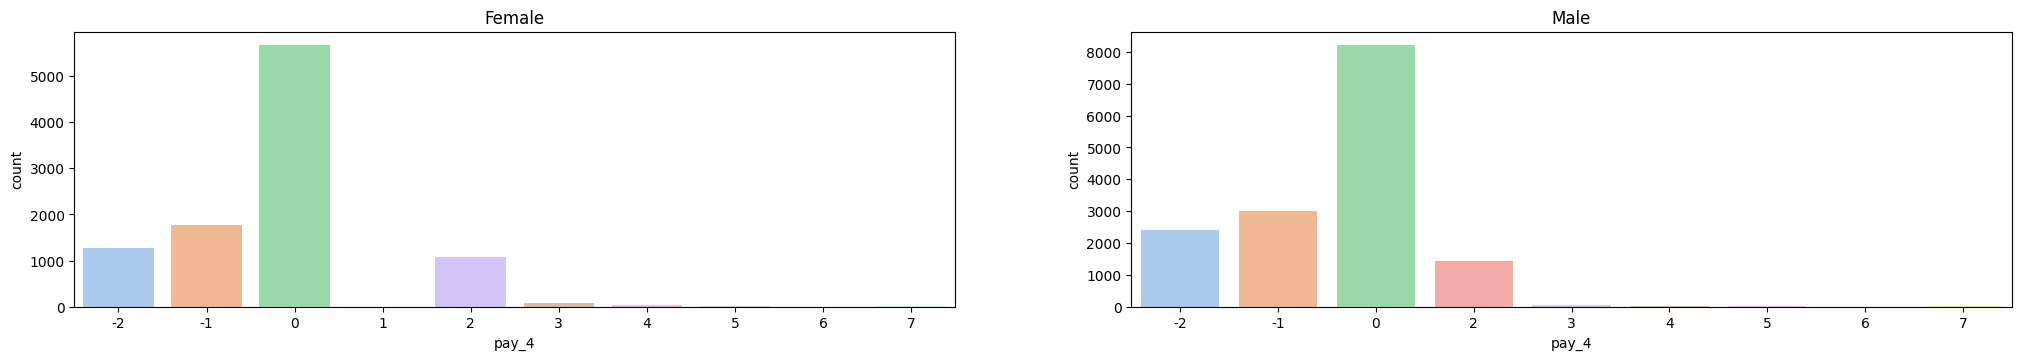

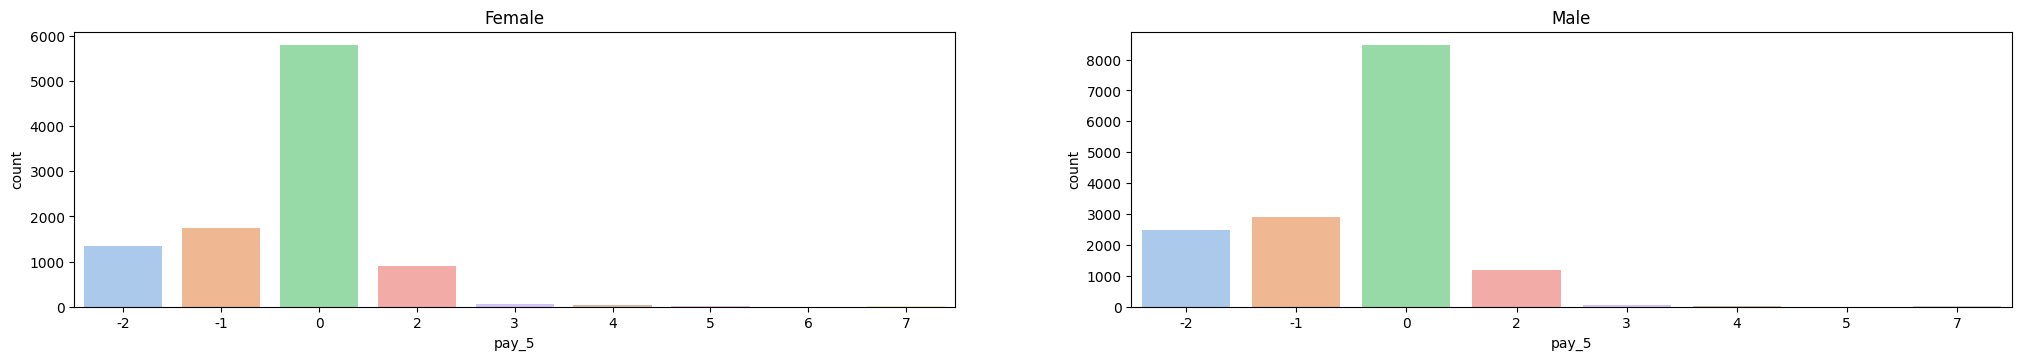

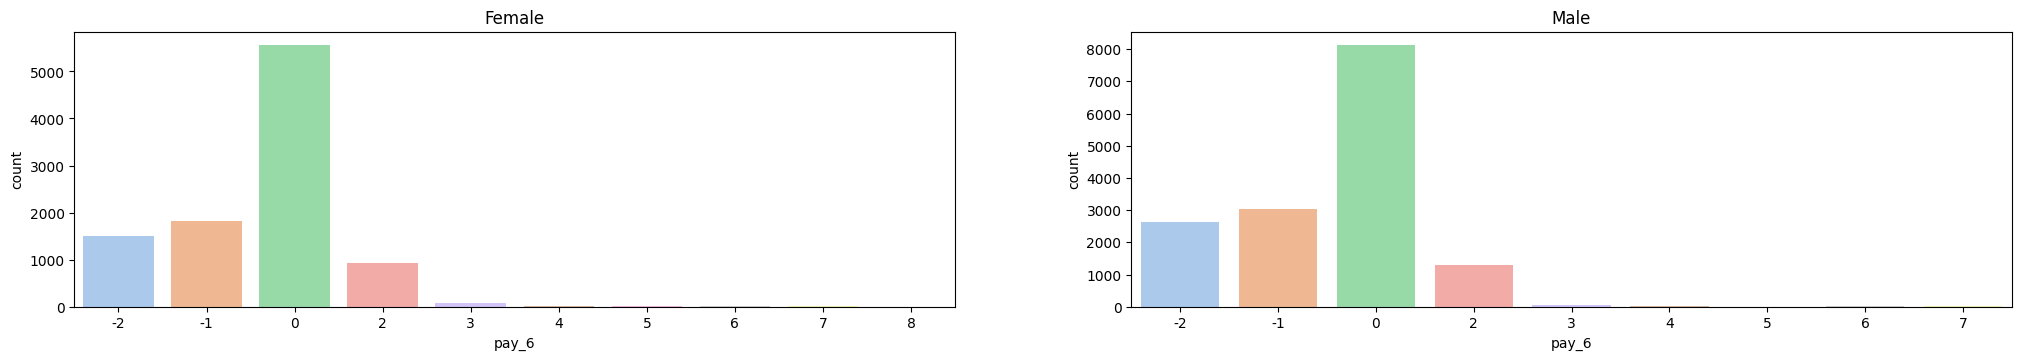

In [72]:
plt.figure(figsize=(25,5))
i = 1
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['sex'].unique():
    df_temp = df[df['sex']==cat]
    plt.subplot(6,2,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel',legend=False,hue=status)
    i=i+1
  plt.show()


<Figure size 2500x500 with 0 Axes>

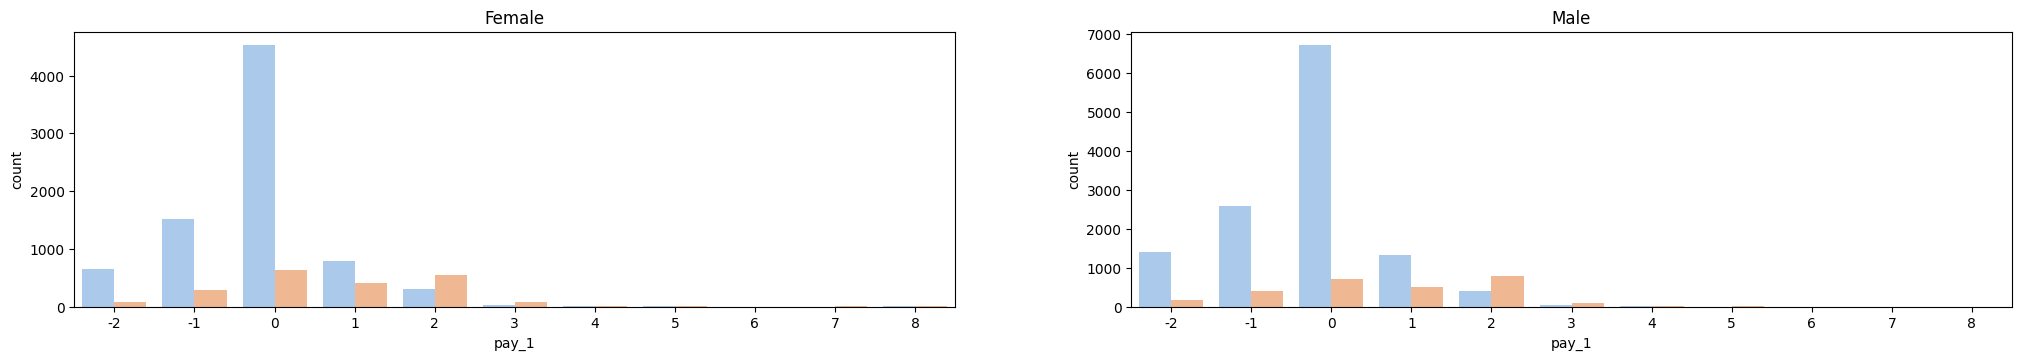

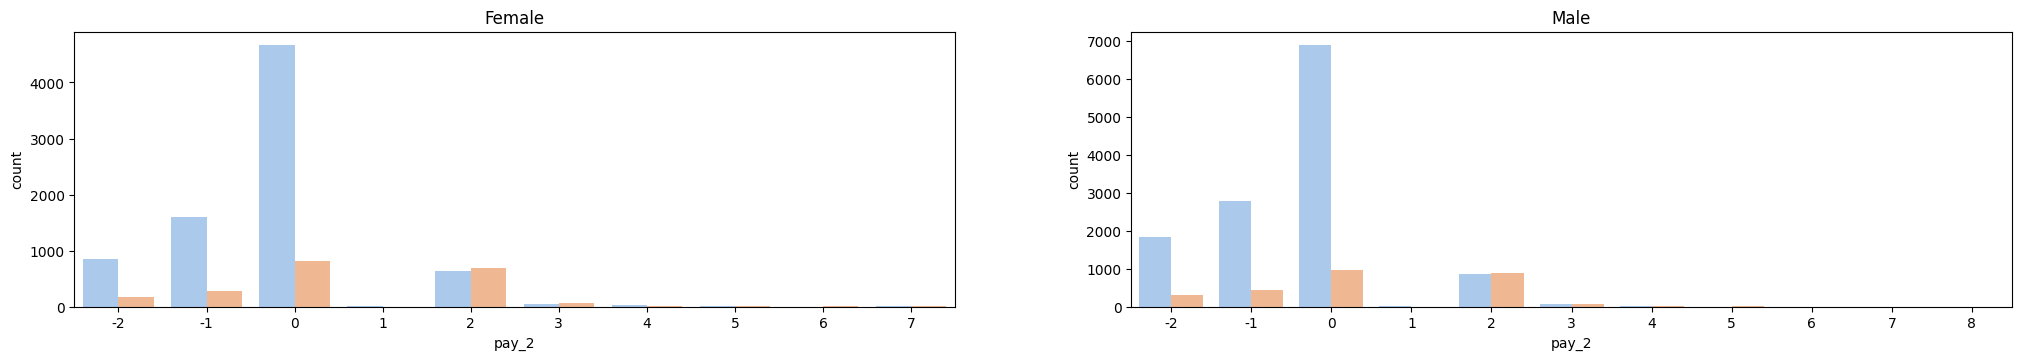

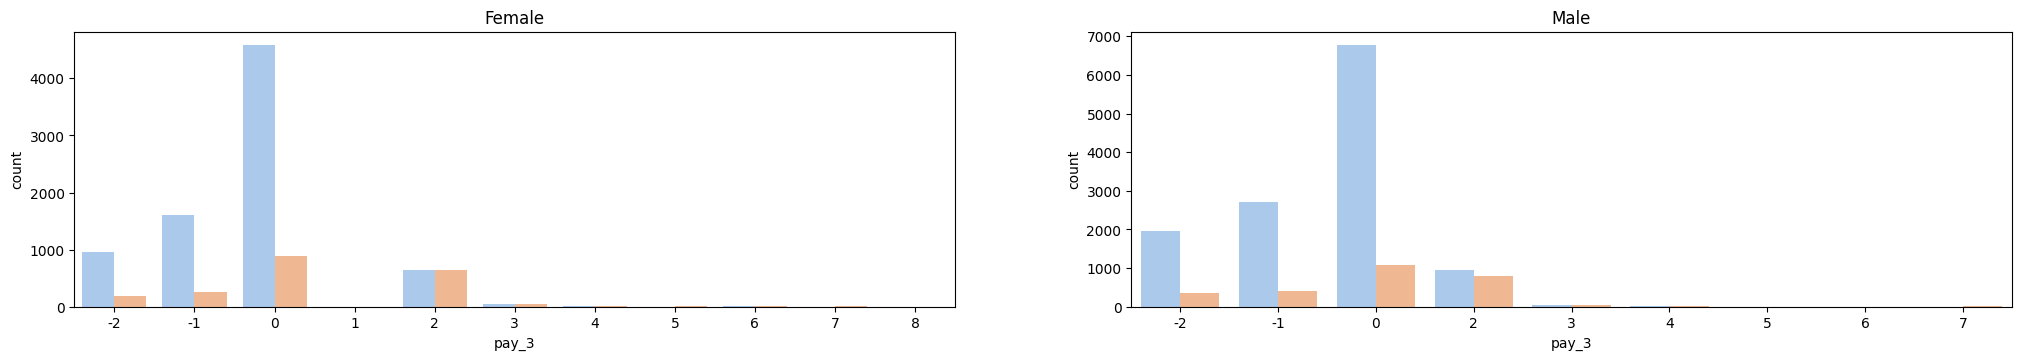

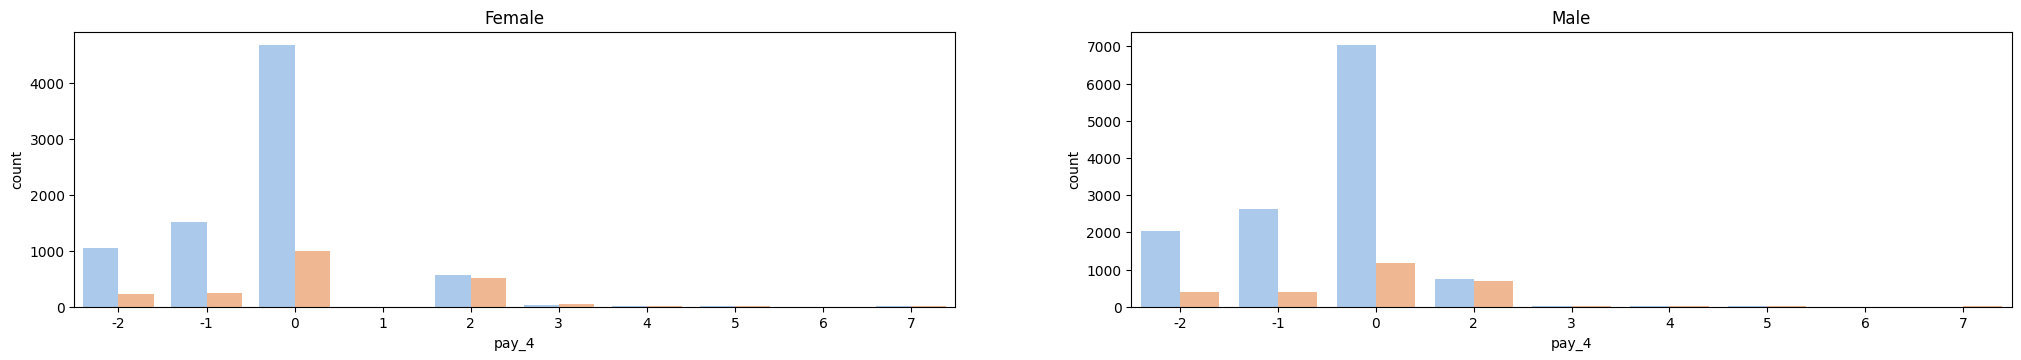

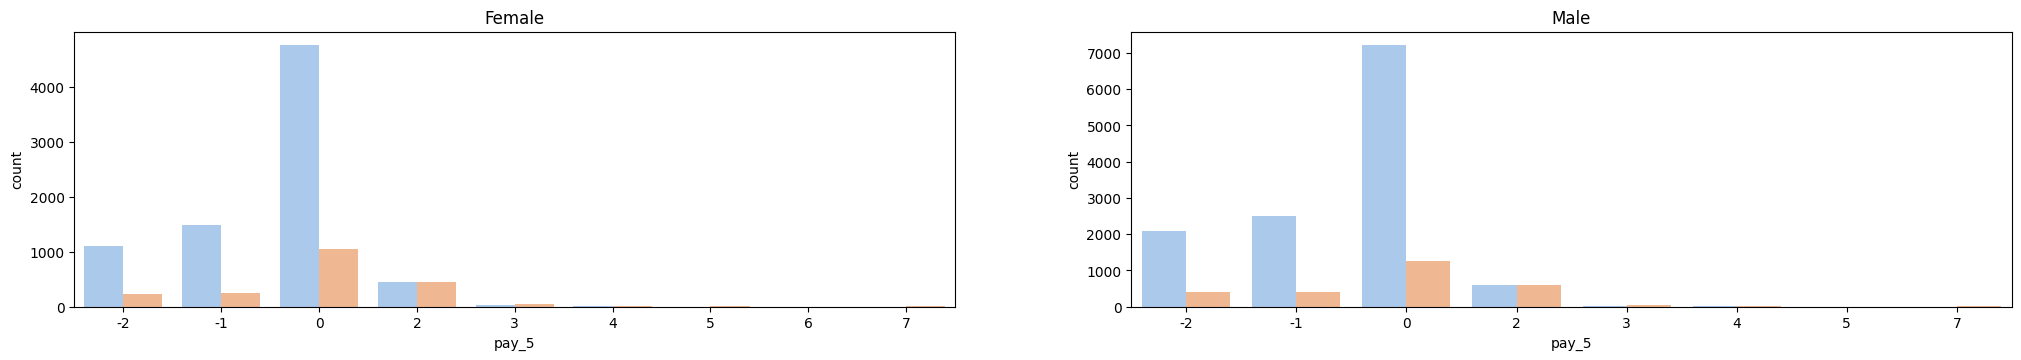

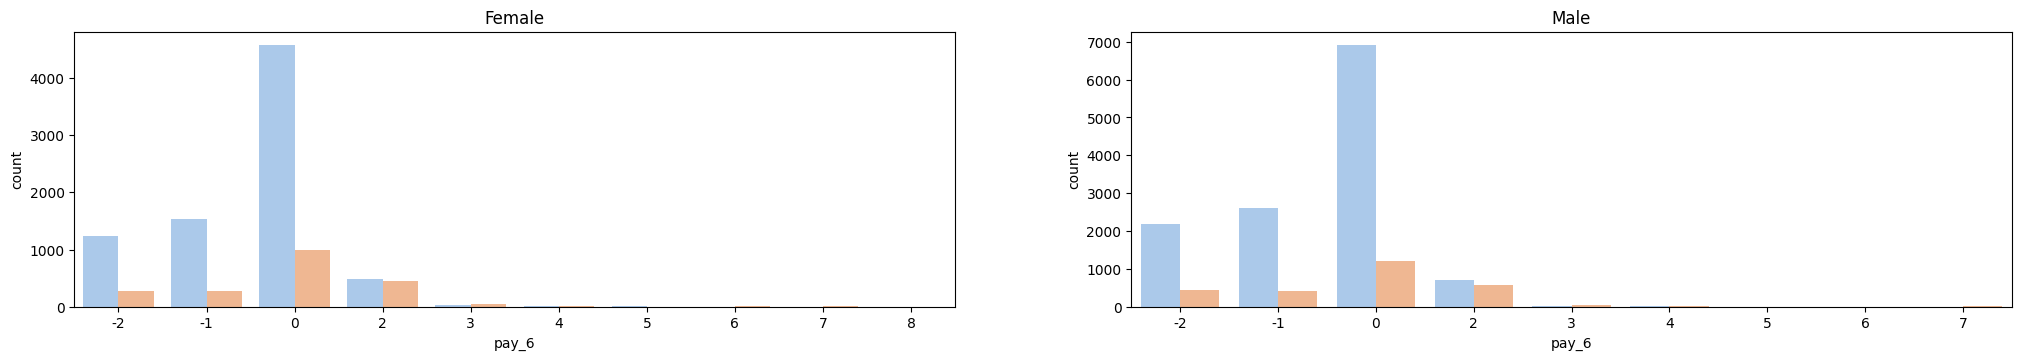

In [73]:
plt.figure(figsize=(25,5))
i = 1
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['sex'].unique():
    df_temp = df[df['sex']==cat]
    plt.subplot(6,2,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel',legend=False,hue='next_month_default')
    i=i+1
  plt.show()

## Education

In [74]:
df['education'].value_counts()

education
University         11657
Graduate School     8944
High School         4096
Others               424
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

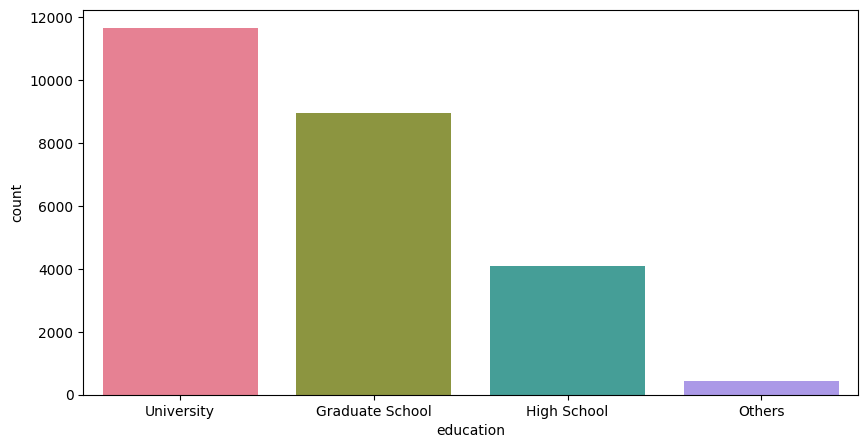

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'education', data = df,palette='husl')

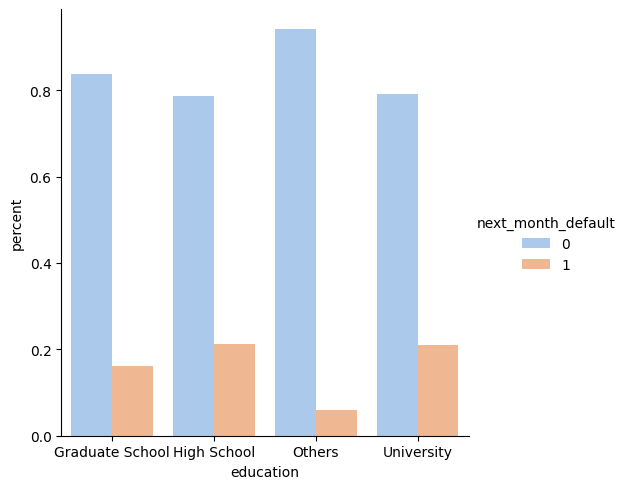

In [78]:
(df.groupby('education')['next_month_default'].value_counts(normalize=True).rename('percent').reset_index().pipe((sns.catplot,'data'), x='education',y='percent',hue='next_month_default',kind='bar', palette = 'pastel'))

* University students are the majority of customers
* Majority of defaulter are from University and High School

### Education with Marriage Analysis

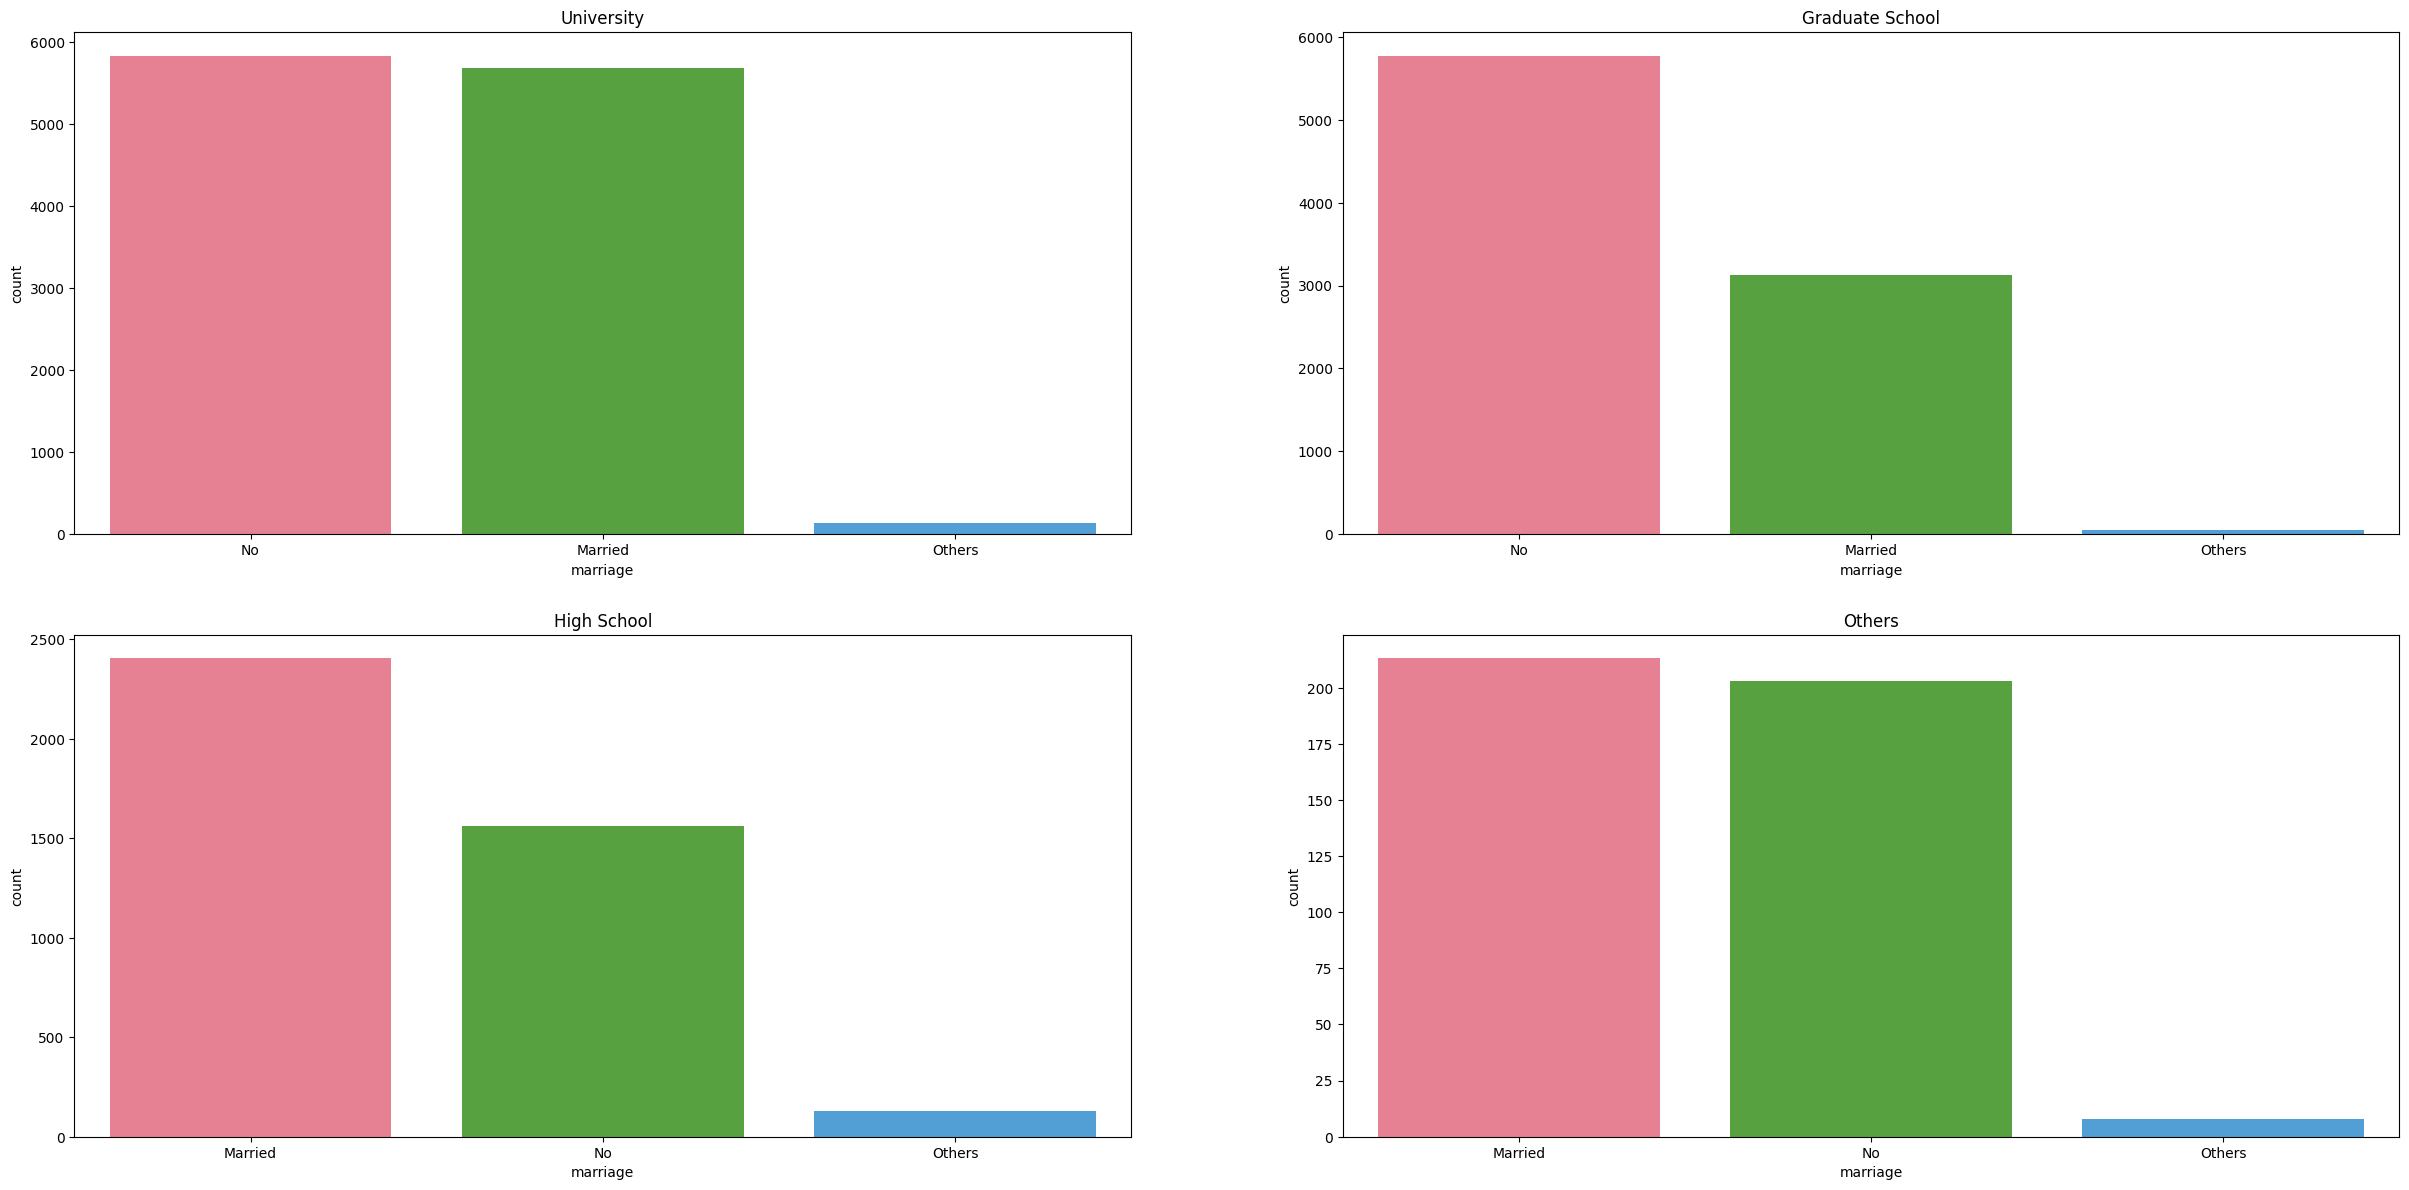

In [79]:
i=1
plt.figure(figsize=(30,30))
for cat in df['education'].unique():
  df_temp = df[df['education']==cat]
  plt.subplot(4,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='marriage',palette='husl',legend=False)
  i=i+1
plt.show()

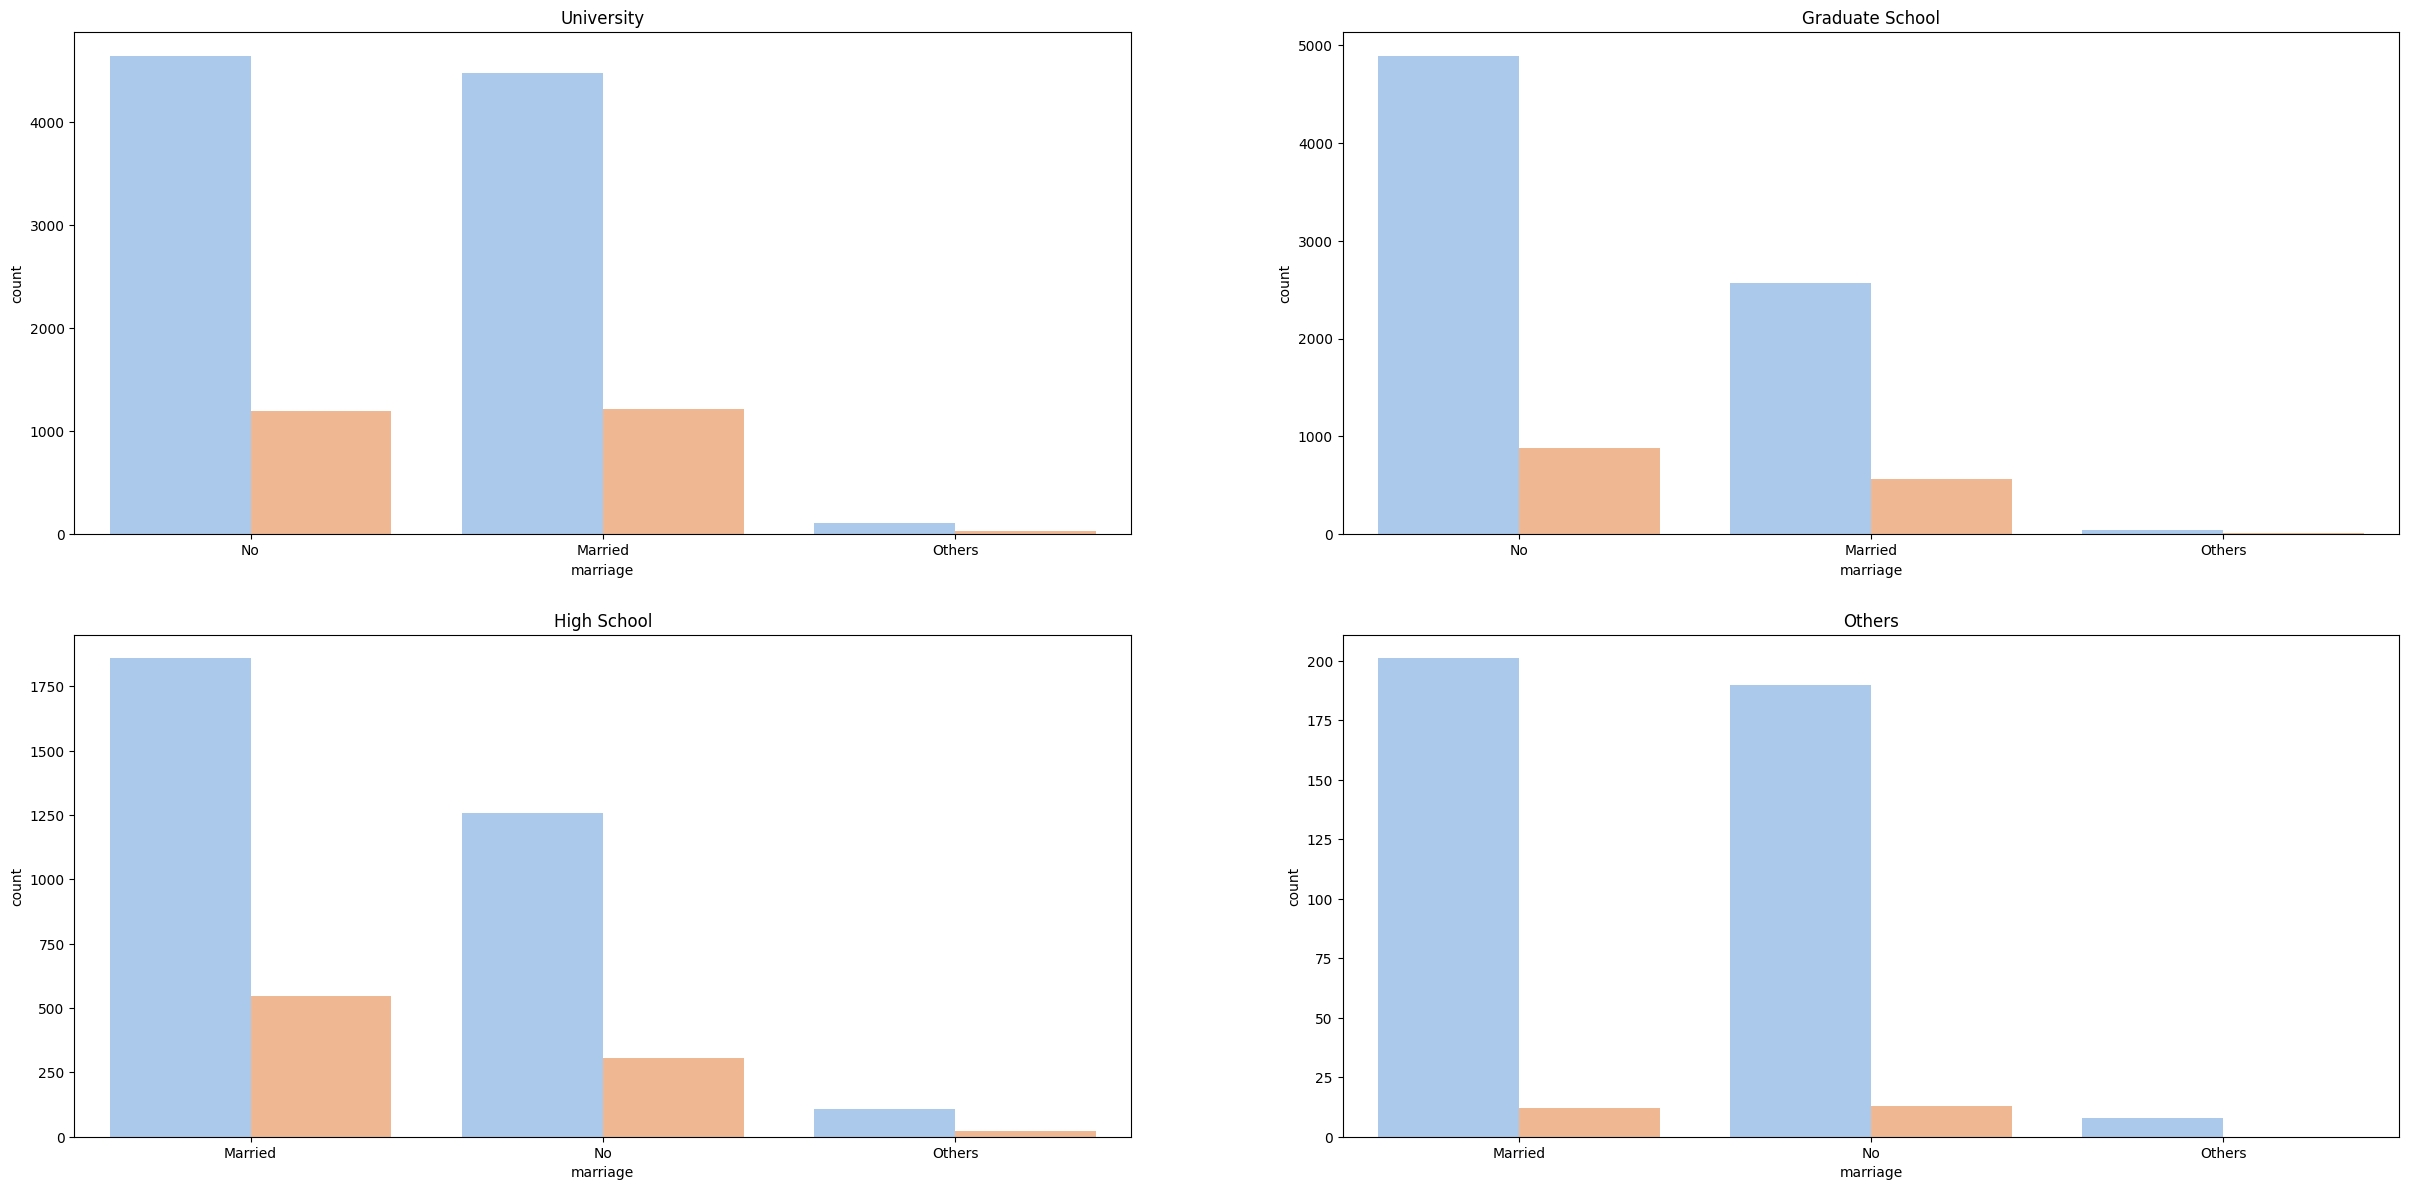

In [81]:
i=1
plt.figure(figsize=(30,30))
for cat in df['education'].unique():
  df_temp = df[df['education']==cat]
  plt.subplot(4,2,i)
  plt.gca().title.set_text(cat)
  sns.countplot(data=df_temp, x='marriage',palette='pastel',legend=False,hue = 'next_month_default')
  i=i+1
plt.show()

* Proportion of defaulter to Non defaulter is almost same in all education categories

### Education with Payment Status pay_1 to pay_6

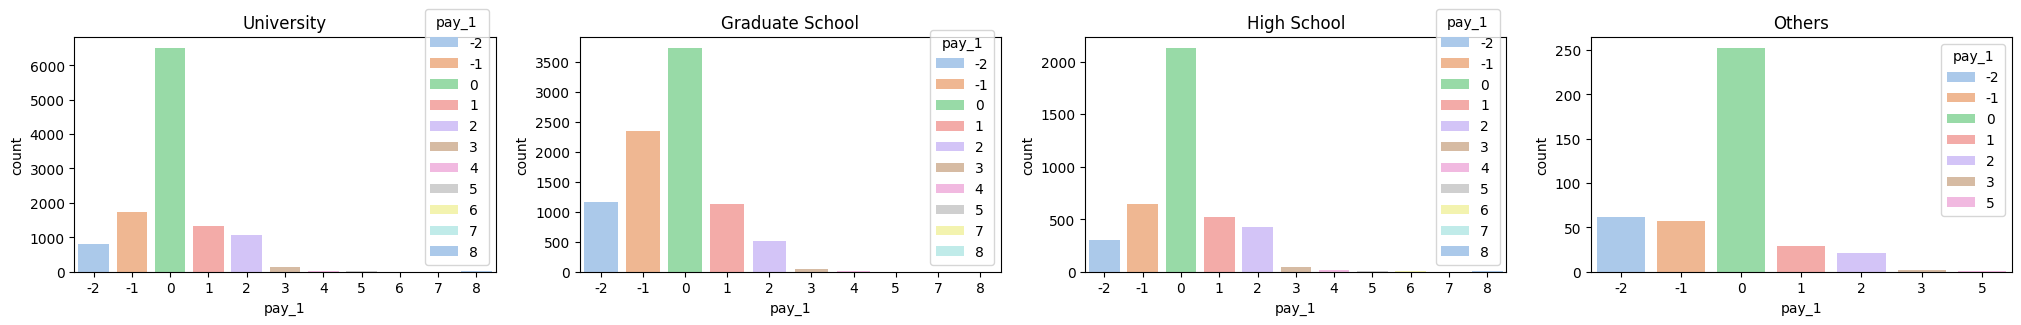

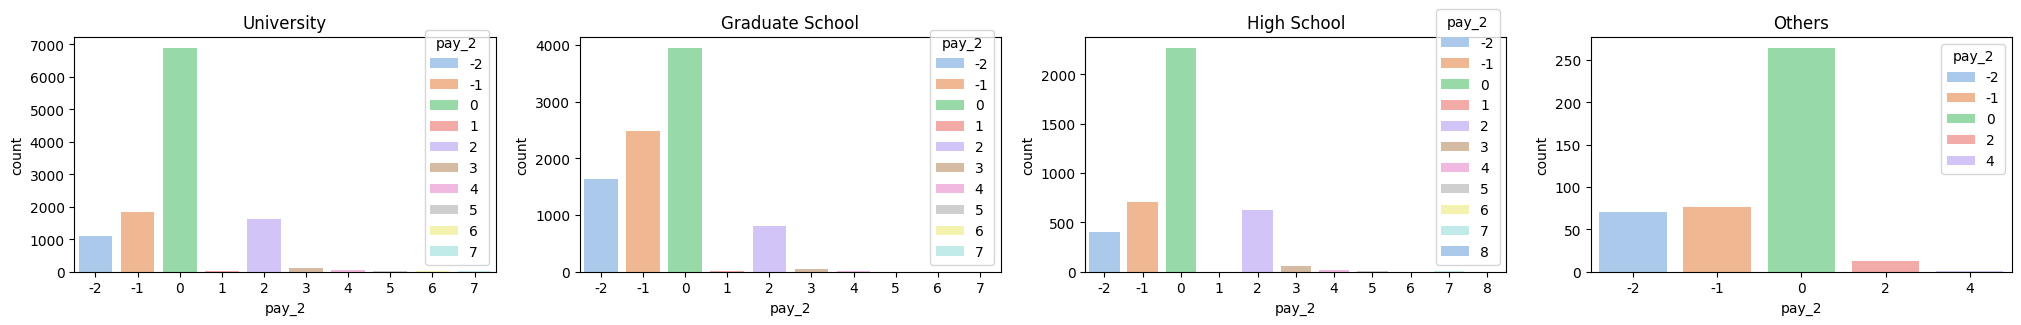

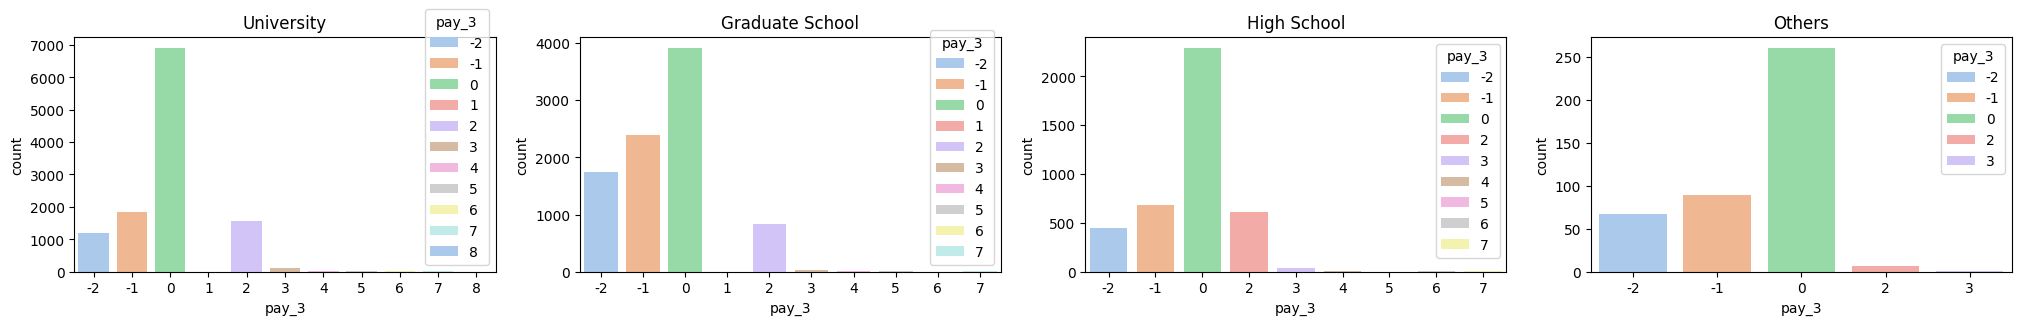

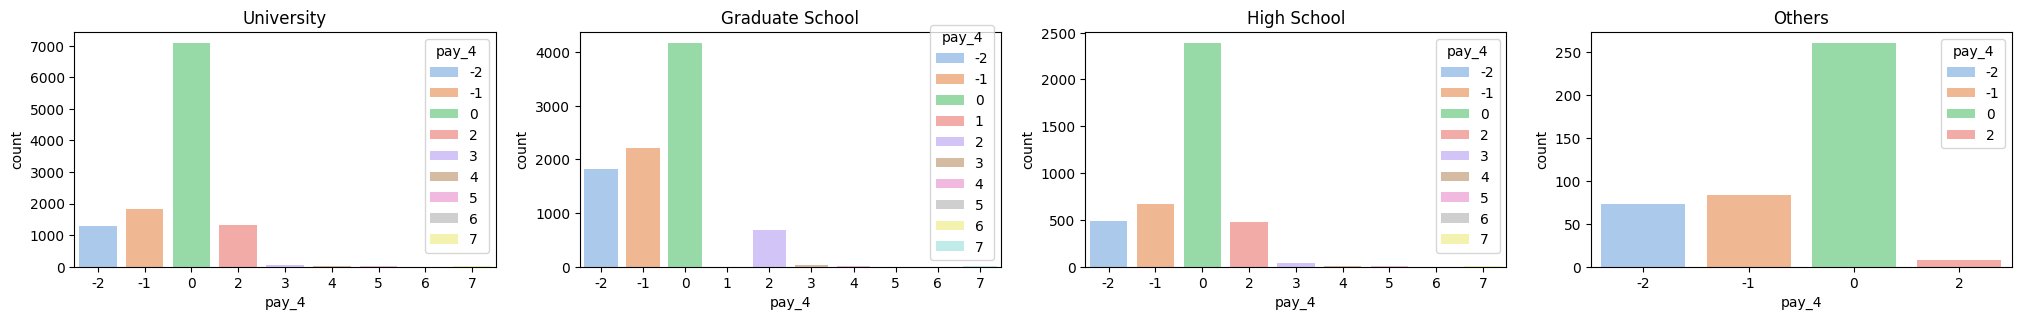

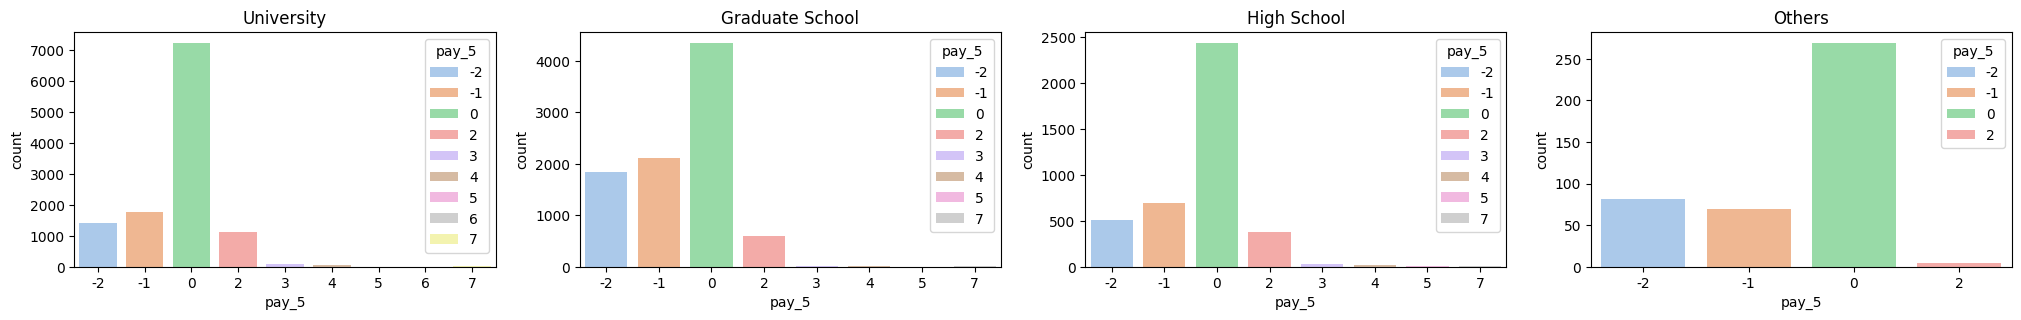

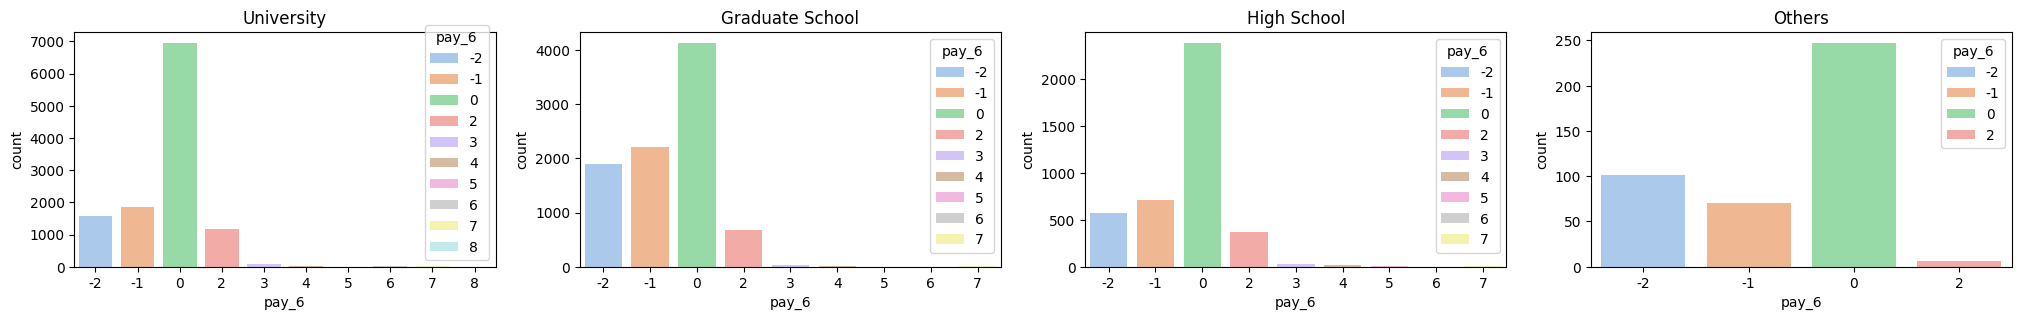

In [82]:
i=1
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['education'].unique():
    df_temp = df[df['education']==cat]
    plt.subplot(7,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel', hue=status)
    i=i+1
  plt.show()

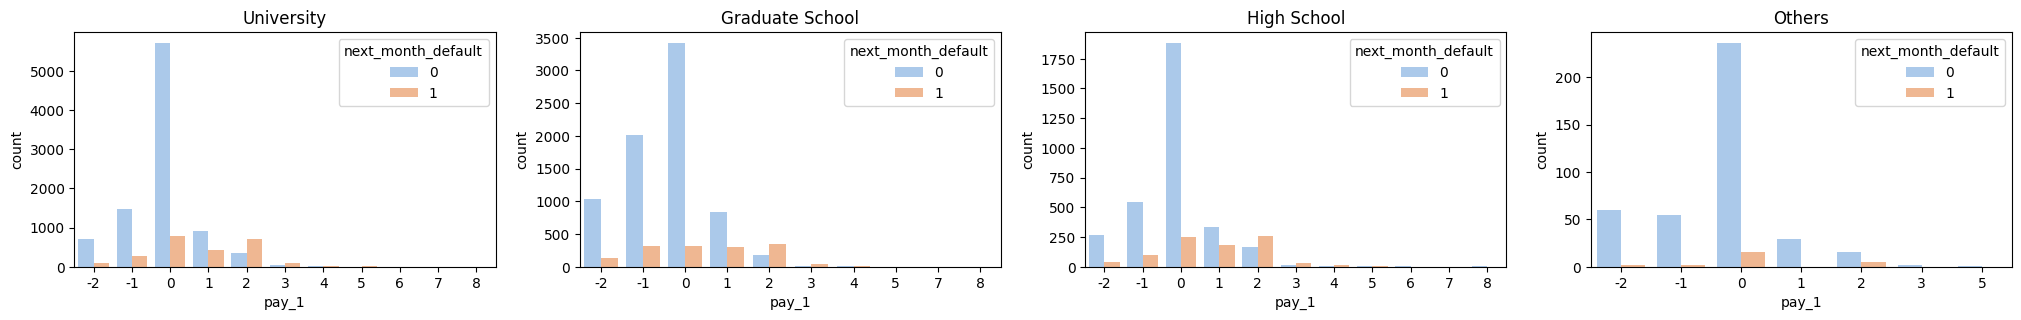

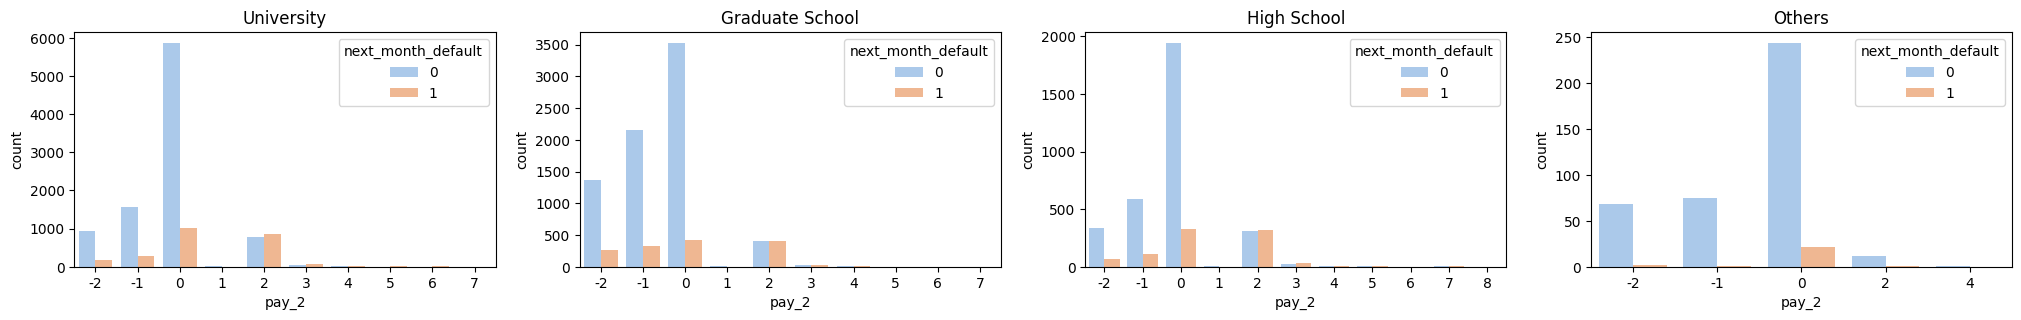

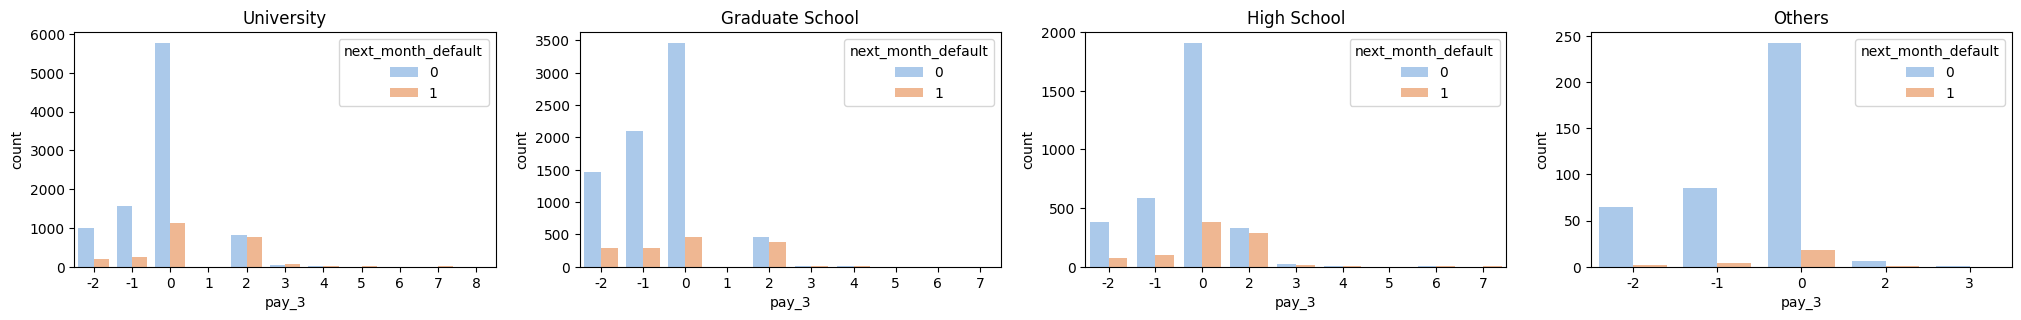

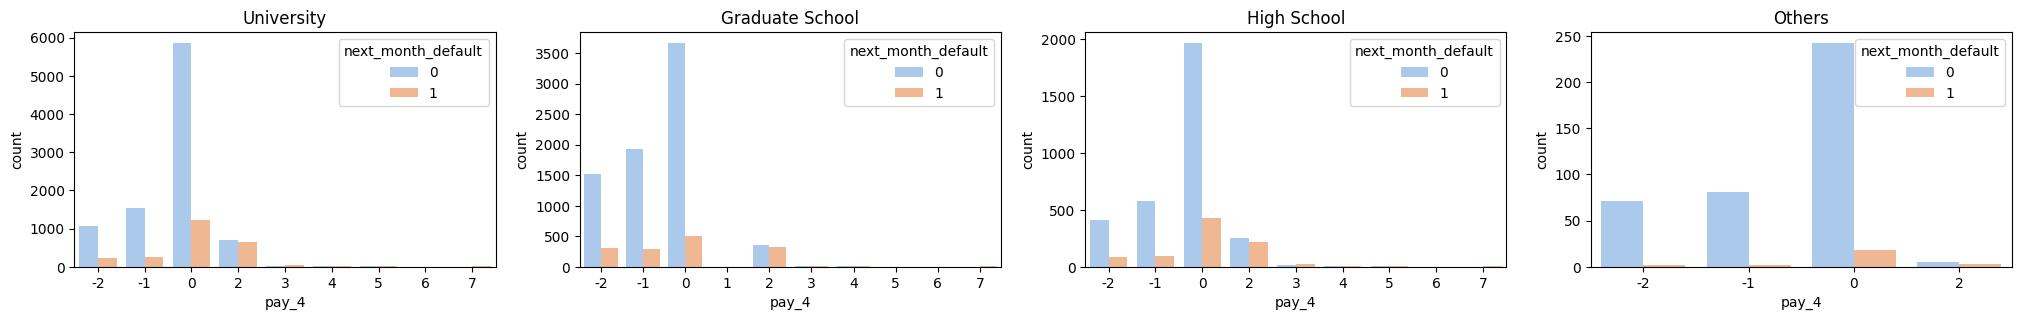

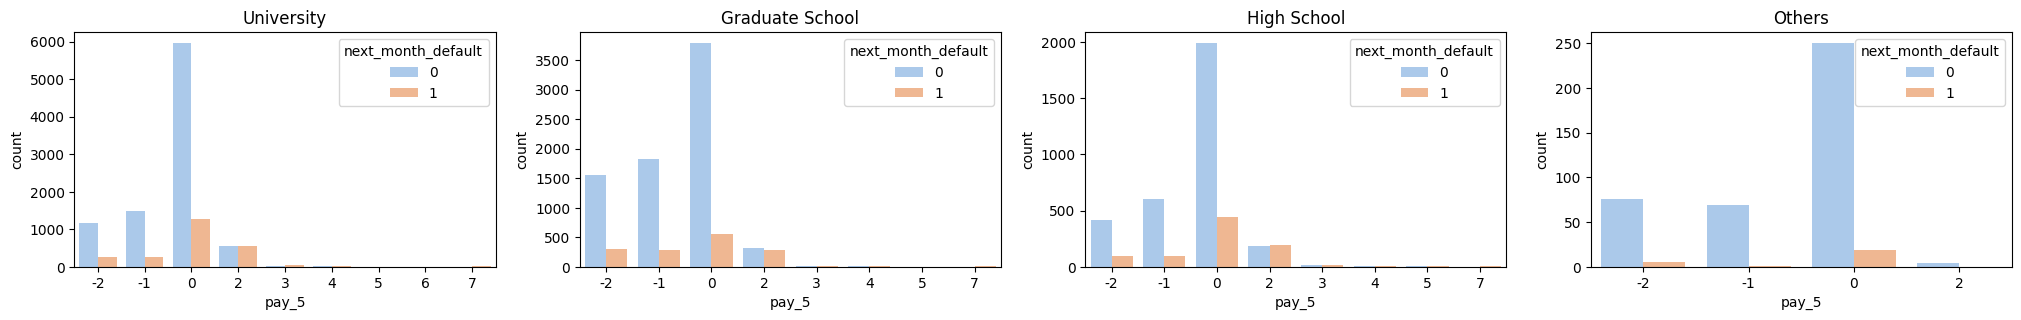

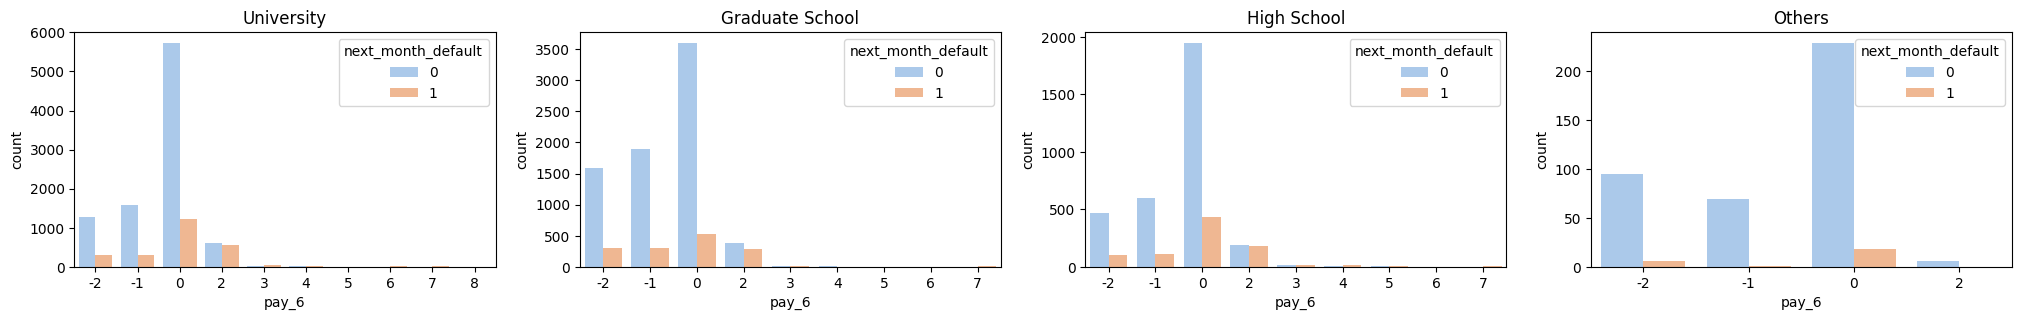

In [83]:
i=1
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['education'].unique():
    df_temp = df[df['education']==cat]
    plt.subplot(7,4,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel', hue='next_month_default')
    i=i+1
  plt.show()

* Graph does not show much variation as we move from month1 to month6

## Marriage

In [84]:
df['marriage'].value_counts()

marriage
No         13374
Married    11424
Others       323
Name: count, dtype: int64

<Axes: xlabel='marriage', ylabel='count'>

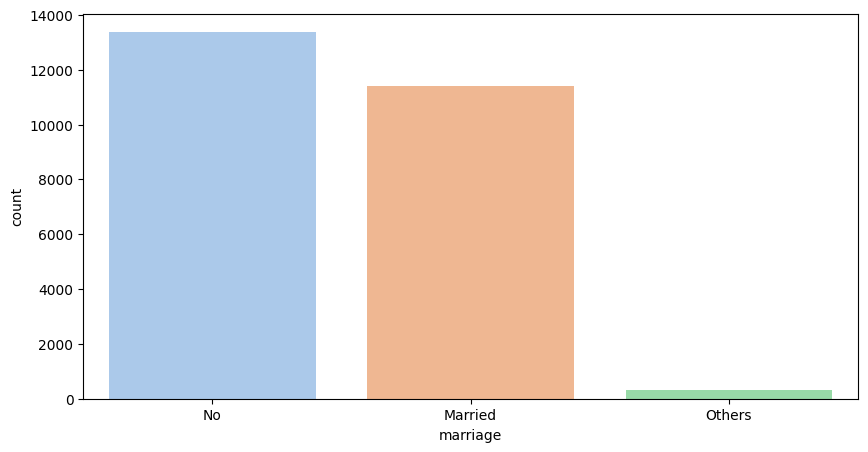

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'marriage', data = df,palette='pastel')

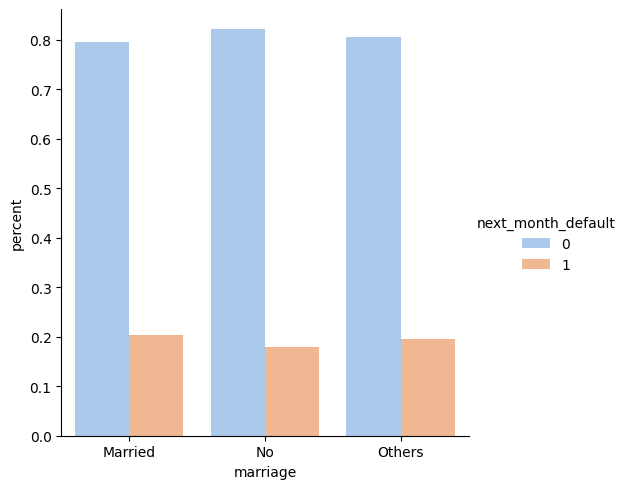

In [88]:
(df.groupby('marriage')['next_month_default'].value_counts(normalize=True).rename('percent').reset_index().pipe((sns.catplot,'data'), x='marriage',y='percent',palette='pastel',hue='next_month_default',kind='bar'))

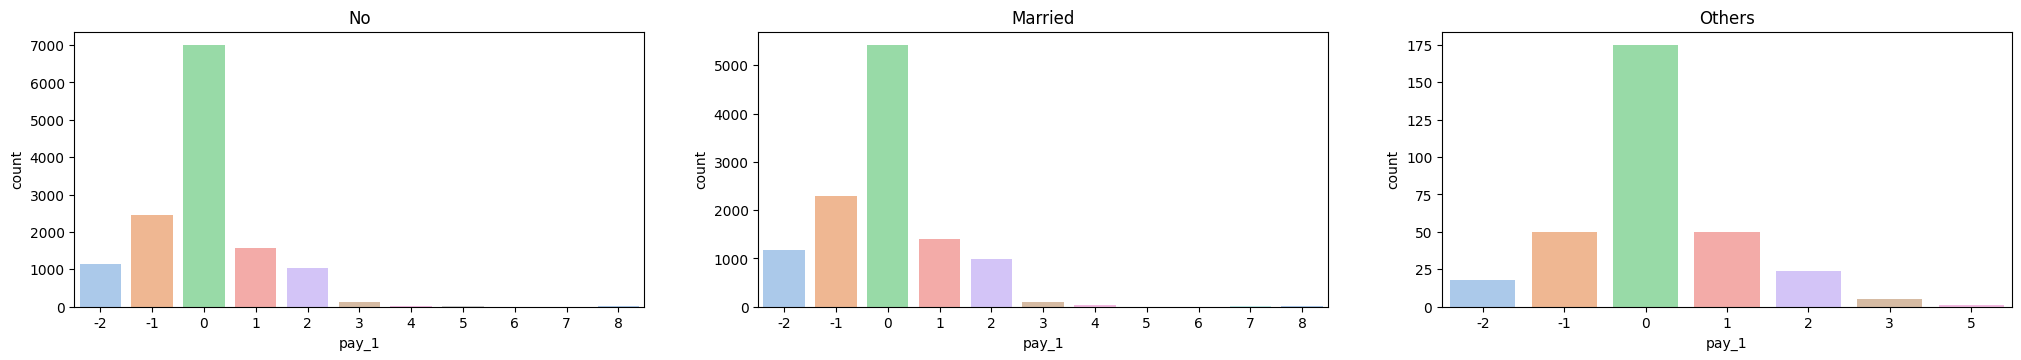

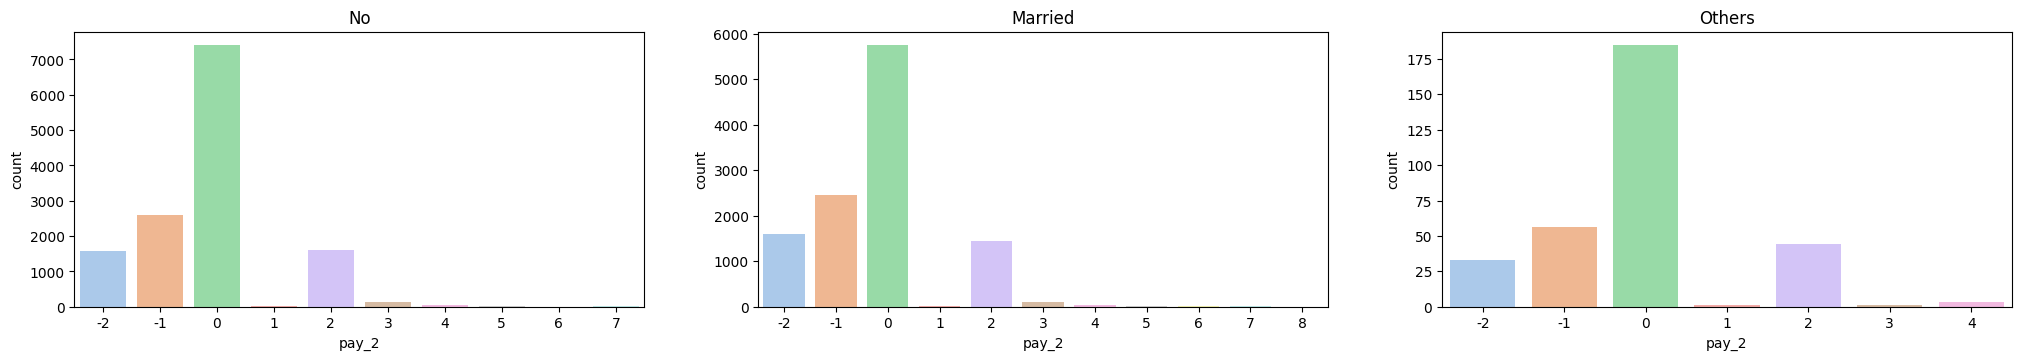

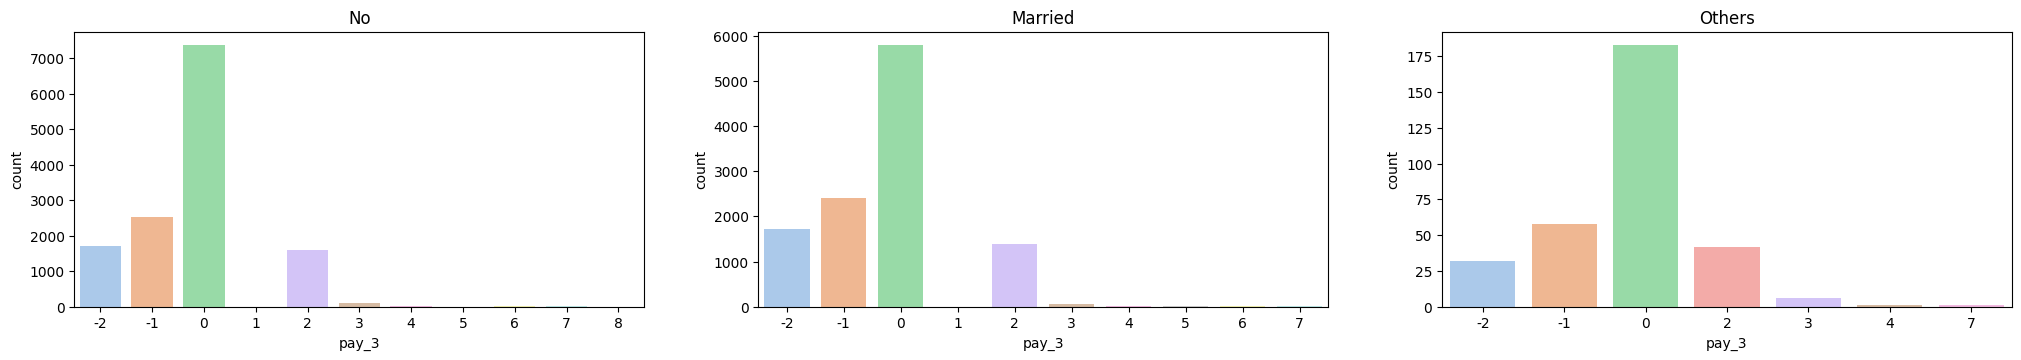

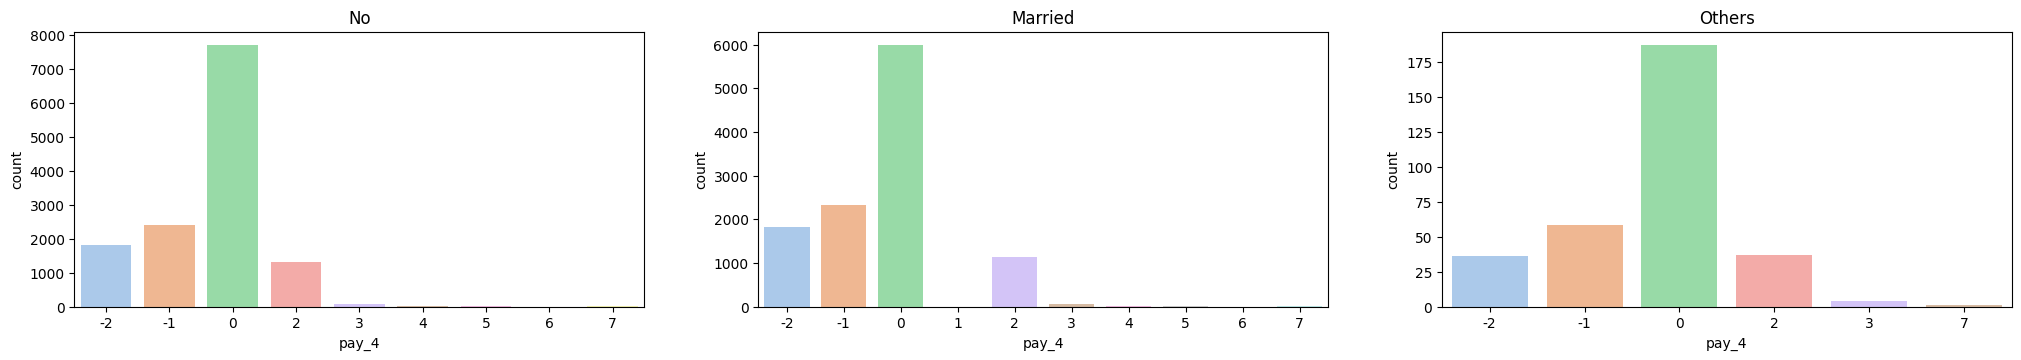

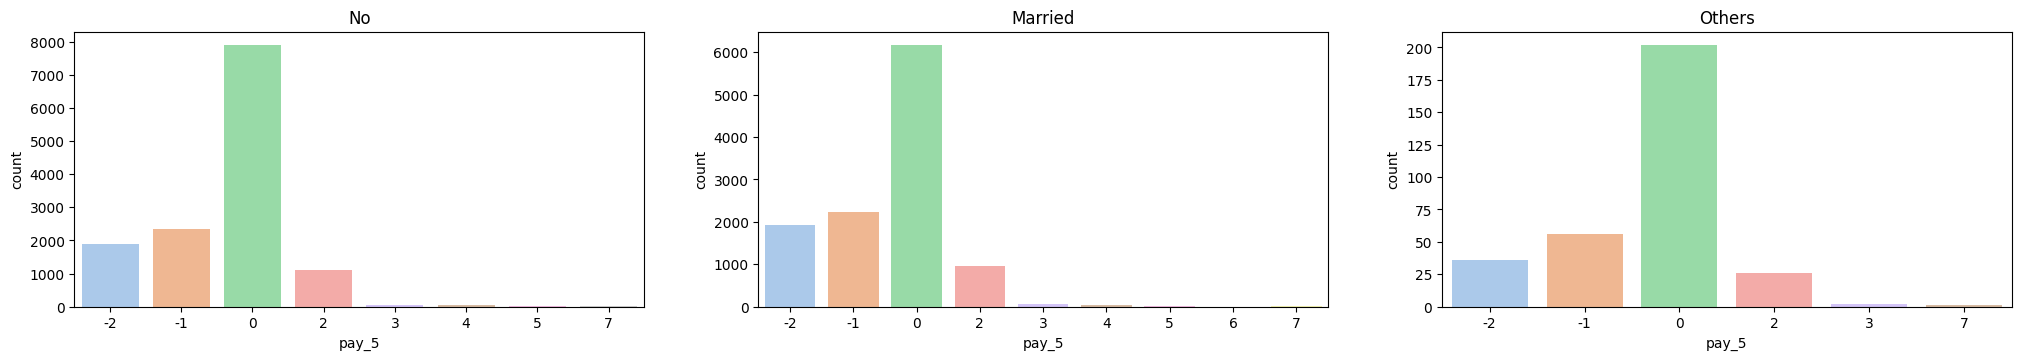

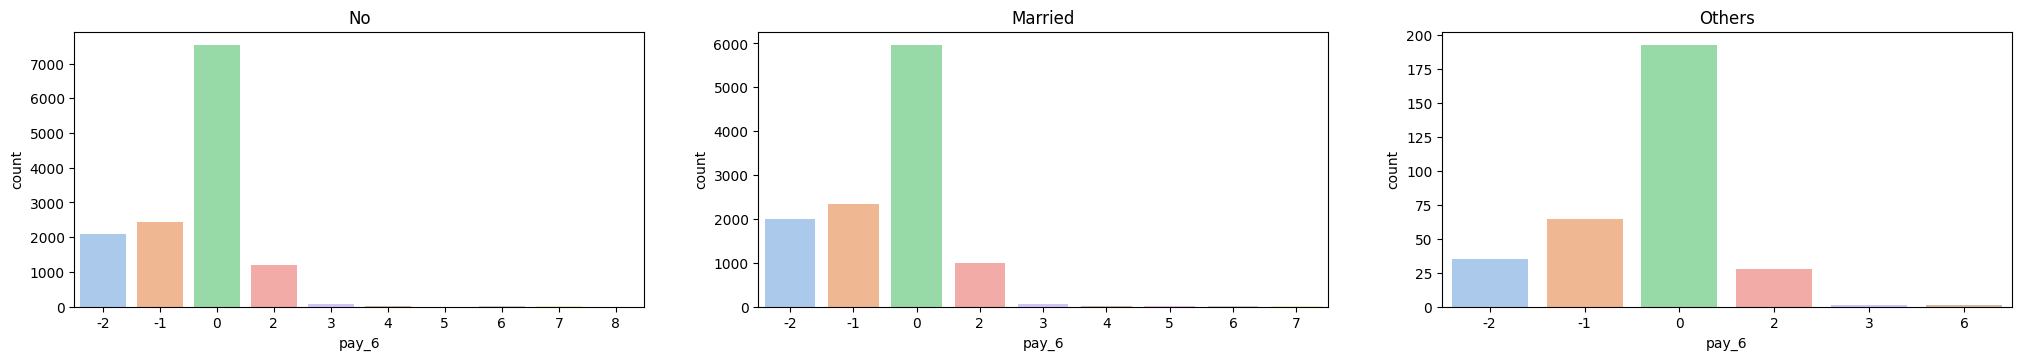

In [89]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
i=1
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['marriage'].unique():
    df_temp = df[df['marriage']==cat]
    plt.subplot(6,3,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel')
    i=i+1
  plt.show()

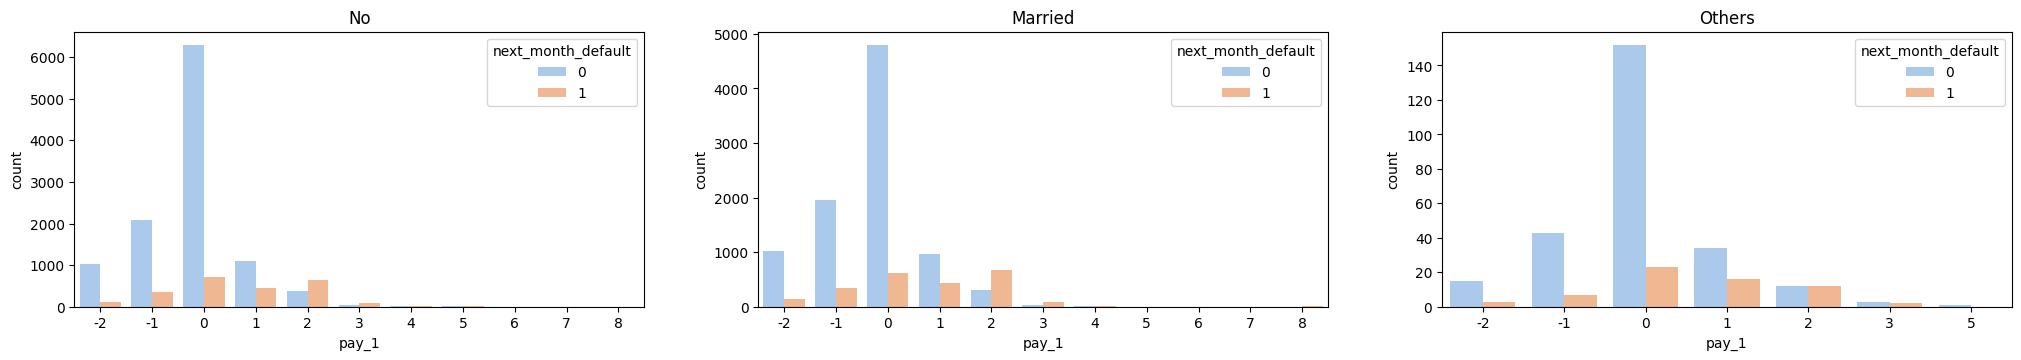

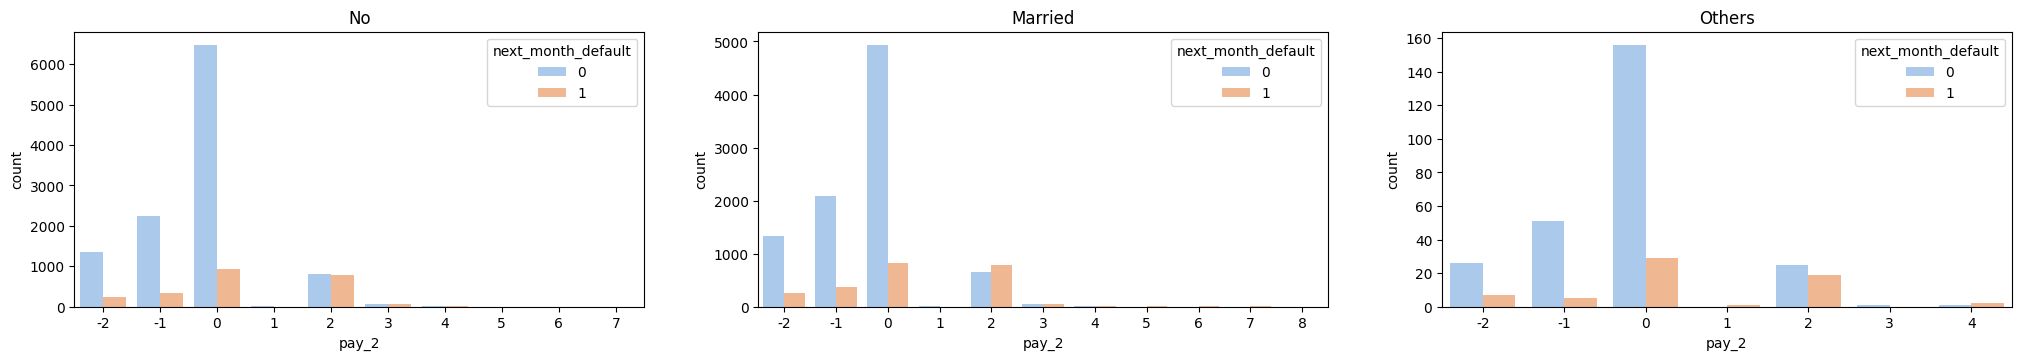

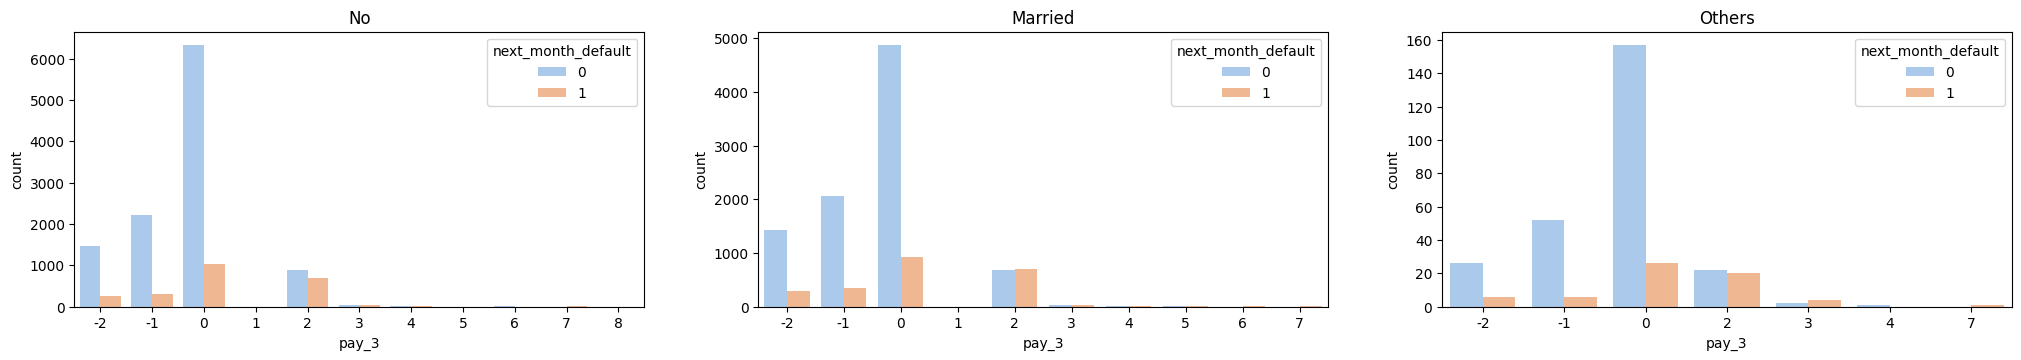

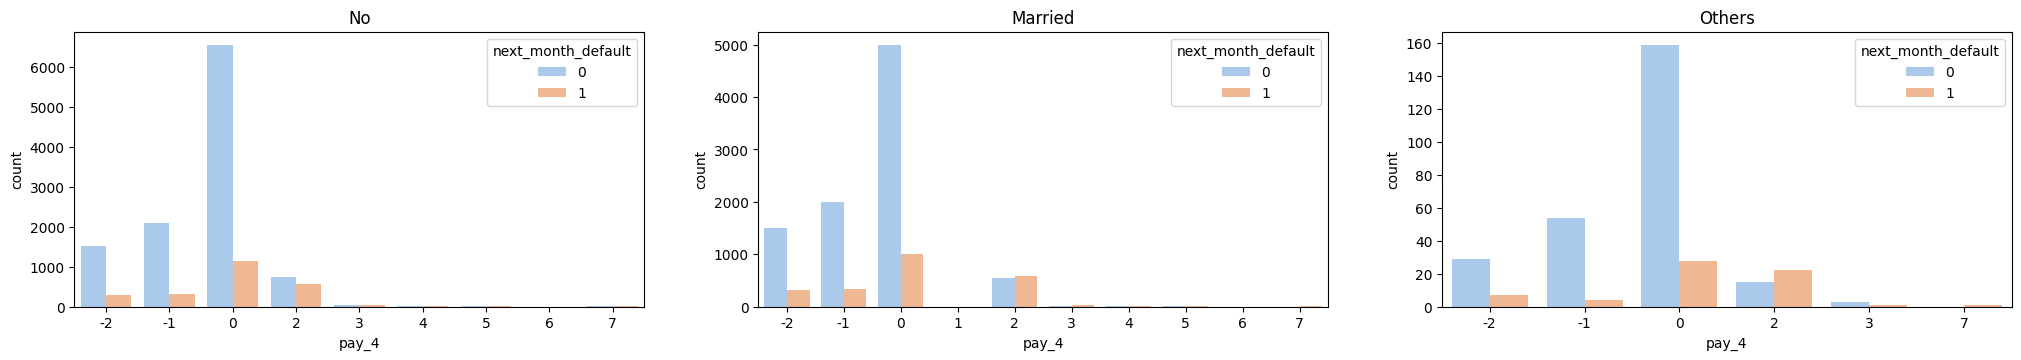

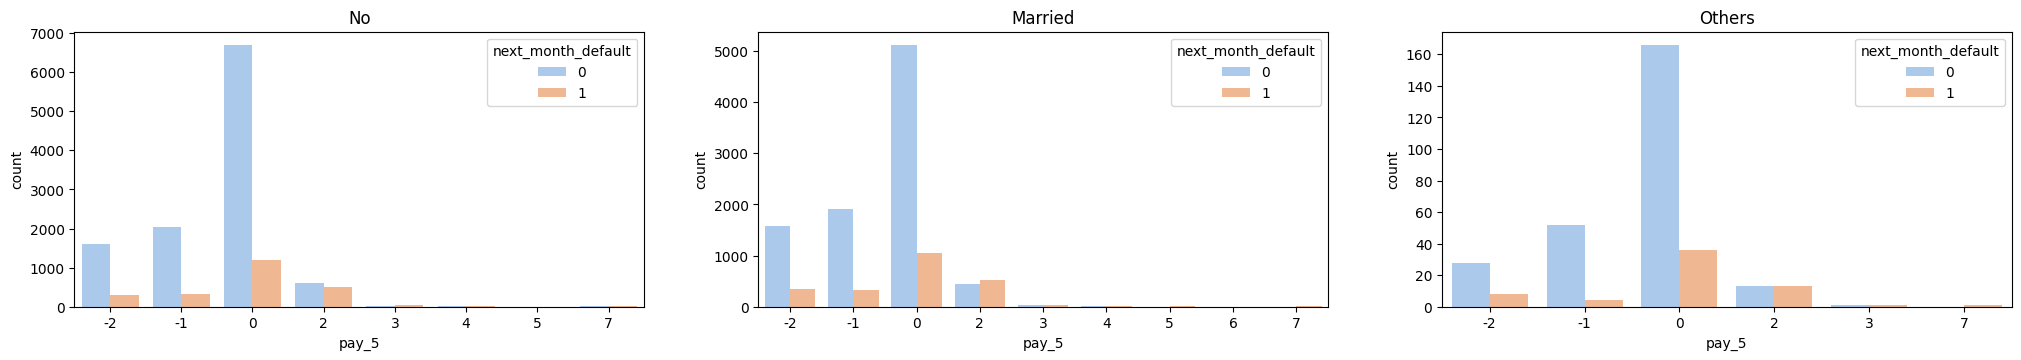

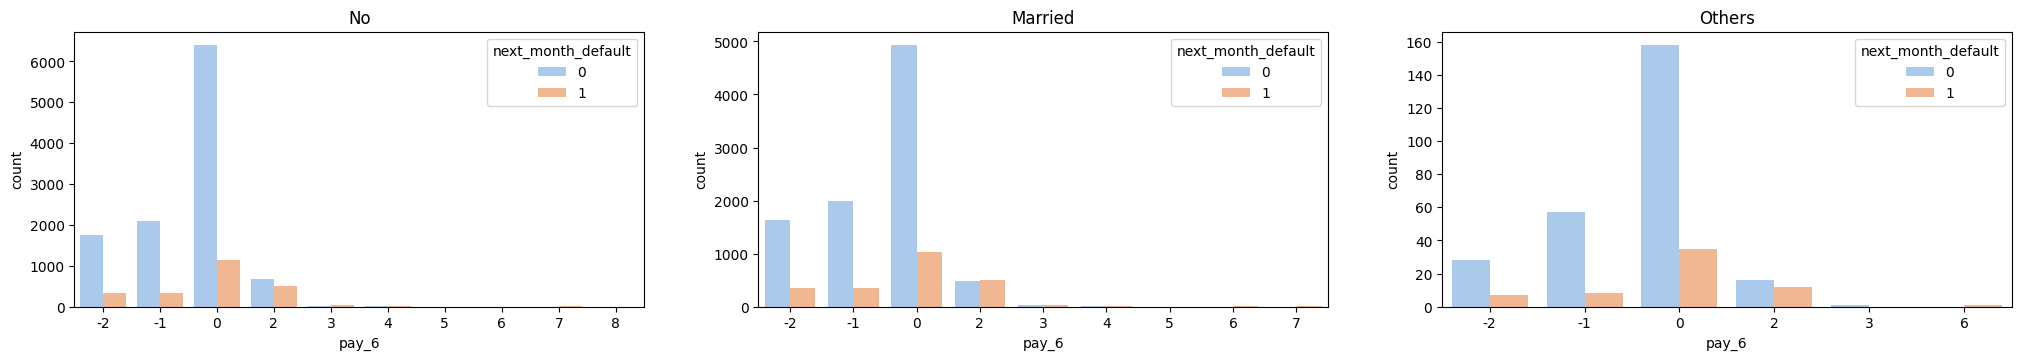

In [90]:
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
i=1
for status in pay_cols:
  plt.figure(figsize=(25,25))
  for cat in df['marriage'].unique():
    df_temp = df[df['marriage']==cat]
    plt.subplot(6,3,i)
    plt.gca().title.set_text(cat)
    sns.countplot(data=df_temp, x=status,palette='pastel',hue='next_month_default' )
    i=i+1
  plt.show()